# Introduction to Data Science – Project Proposals
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 7 2025, 11:59pm.

In this project report we will mention basic information about the members, background and motivation for choosing the direction of the project, setting the project objectives, asking the main questions and setting learning objectives, performing data description and acquisition, ethical considerations and potential harms of the direction, performing data cleaning and processing then exploratory analysis including the analytical methods used, and finally developing a timeline for the group project.


# Project Title: Microeconomic Analysis of Wheat Pricing and Market Behavior in Kansas: Exploring Local Agricultural Trends

## Team Members:
NAME(EMAIL, UID)
- **YUYANG YAO** (<u1400651@umail.utah.edu>, u1400651)
- **NICLAS SCOTT HOLMAN** (<u1281501@umail.utah.edu>, u1281501)
- **WEITONG NIU** (<u1345736@umail.utah.edu>, u1345736)

## Background and Motivation

The motivation for this project arises from the ongoing importance of wheat as a staple agricultural commodity, particularly in local markets such as Kansas. Numerous factors, including production levels, supply chain issues, weather, export-import dynamics, and local consumption patterns, influence wheat pricing. As wheat production plays a crucial role in Kansas state's local crop economies, understanding the microeconomic factors behind its pricing and market behavior is critical for optimizing and efficient decision-making by local farmers, policymakers, and businesses like demand, supply, equilibrium price, and quantity trend forecast. 

Our team is interested in understanding how local factors, such as environmental and weather conditions, Market Structure (wheat should ), production efficiency (technology ex), and trade policies (tariffs and tax ex), affect wheat prices in Kansas (we may only focus on a few of them). In recent years, fluctuations in agricultural commodity prices have led to significant economic consequences for both producers and consumers in the region. By exploring these local dynamics, we will strive to provide valuable insights that could help mitigate risks associated with price volatility and optimize agricultural practices in the region. We are also interested in the seasonal trend of the price of wheat.

Through this analysis, we hope to contribute to a broader understanding of the agricultural markets in Kansas (ex-test if the model fits more generally), which can potentially be applied to other regions with similar economic and agricultural structures. Furthermore, this study aligns with current trends in using microeconomic theory to analyze agricultural markets and predict future market behaviors, particularly in the context of policy changes or shifts in production patterns due to supply and demand shifts together with elasticity and so on.

## Project Objectives

- **Primary Questions**:
  - How do local factors, such as production levels and stocks, weather factors including rainfall and temperature, **imports, and exports (needs to add)**, influence wheat prices in Kansas? How are these variables correlated?
  - What are the key determinants of wheat supply and demand in Kansas's wheat market? I.e. except for sales and production, what other factors matter to my model?
  - Can we identify significant trends in wheat pricing and market behavior based on historical data?
  - How do we interpolate or adjust annual production data to obtain monthly or seasonal production data to match prices (Most reports and data are annual)?
   - How to do the missing sales in 2024 or other data influence the trend in regression? How to fix it?

- **Learning Objectives**:
  - Develop expertise in applying microeconomic concepts, such as supply (supply shock) and demand estimation models, market equilibrium distributions (maybe parametric or nonparametric), and price elasticity, to an agricultural market context.
  - Gain experience in working with time series data :(optional: Brownian motion (BM) (need to decompose, helpful for price volatility as diffusion matrix), exponential smoothing, ARIMA, including understanding seasonal trends and their impact on pricing to provide the approximate distribution type for regression (hopefully linear) and visualization.
  - Understand the role of local market dynamics within broader national and global agricultural trade systems (especially Kansas, which has the highest wheat production in the United States).
  - Learn how to conduct data cleaning and preparation (including quarterly stock info, not montly), do exploratory analysis, and develop forecasting models using historical agricultural data.
  - more details in the analysis part

In [5]:
from prophet import Prophet
import seaborn as sns

from bs4 import BeautifulSoup
import urllib.request

import pandas as pd
import scipy as sc
import numpy as np
import urllib.request

import statsmodels.formula.api as sm
from scipy.stats import lognorm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

df_what_price_usa_recently=pd.read_csv('what_price_usa_recently.csv', encoding='utf-8')
df_what_price_usa_recently.rename(columns={"Value": "Price_usa_monthly"}, inplace=True)
#print(df_what_price_usa_recently.info())
#df_what_price_usa_recently.head()

In [6]:
df_kansasdata_1=pd.read_csv('df_kansasdata_1_copy_1.csv', encoding='utf-8')

the overall pattern looks similar to Kansas wheat price as the leading production of wheat in Kansas.

In [8]:
df_production_k_1=pd.read_csv('WHEAT-AcreageYieldandProductionIrrigatedNonIrrigated-2025-03-27.csv', encoding='utf-8') 
#anual not monthly
#print(df_production_k_1.info())
#df_production_k_1.head()

Above df contain some diff kinds of wheat

In [10]:
df_production_only_k_1=pd.read_csv('wheat production kansas anual.csv', encoding='utf-8') #anual not monthly
#print(df_production_k_1.info())
#df_production_only_k_1.head()

In [11]:
df_production_usa_1=pd.read_csv('wheat usa production total.csv', encoding='utf-8')
#df_production_usa_1.head()

stock: [https://quickstats.nass.usda.gov/results/6A4F6845-3BCC-3FCA-A5A4-FCEAF7B44F80} download csv file has erros, will fix later
[DEFAULT]
URL=https://va-dmz-quickstats.va-dmz-asev3.appserviceenvironment.us/results/A4FCED6F-DC79-3D2F-9816-FDB7E5FAB665
[InternetShortcut]
URL=https://va-dmz-quickstats.va-dmz-asev3.appserviceenvironment.us/results/A4FCED6F-DC79-3D2F-9816-FDB7E5FAB665

More: Price received parity refers to the price that farmers receive for their product in relation to a reference or fair price. It compares actual market prices to expected or ideal prices.

## Exploratory Analysis (stock lastly)

We will begin our exploratory data analysis (EDA) by examining the trends in wheat production (supply), sales (demand), exports in export, and prices over time. Specifically, we will (initial aig zag price in line plots already displayed above):
- Create time series plots (multiple modules) to visualize how each variable changes monthly, seasonally, and maybe yearly (may decompose seasonal trends and separate noise using various modules as stated below).
- Generate correlation matrices with heatmap and mutual scatterplots (pairplot) to explore the (linear) relationships between wheat price, supply, demand, and price factors.
- Use histograms to analyze the distribution of wheat pricing trend data.
(- Altair with interactive plots to visualize relationships without regression may be difficult)

(-We may also add wheat types' trends by class to understand how different wheat types behave in the market)

In [15]:
column_name_1=list(df_kansasdata_1.axes[1])
print(column_name_1)

['Time_plot', 'Year', 'Period', 'State', 'Commodity', 'Data Item', 'Price_Kansas_monthly', 'Price_usa_monthly', 'Price_corn_monthly', 'Date', 'Rainfall_Kansas', 'Avg_Tem_k', 'Year_sale', 'Period_sale', 'Sales_Kansas_monthly', 'Import_usa_monthly', 'Export_usa_monthly', 'Avg_Production', 'Annual_Production', 'Sales_Kansas_monthly_approx', 'Price Elasticity of Demand(sales by time', 'Kansas production/USA production', 'Export_Kansas_monthly_approx', 'Import_Kansas_monthly_approx']


In [142]:
print(column_name_1)
#print(df_kansasdata_1.info())
column_name_2_numeric=['Price_Kansas_monthly', 'Price_usa_monthly', 'Price_corn_monthly', 'Rainfall_Kansas', 'Avg_Tem_k', 'Year_sale',  
                       'Sales_Kansas_monthly_approx','Import_usa_monthly', 'Export_usa_monthly', 'Avg_Production', 
                       'Price Elasticity of Demand(sales by time','Kansas production/USA production', 'Export_Kansas_monthly_approx', 'Import_Kansas_monthly_approx']
df_kansasdata_2=df_kansasdata_1[column_name_2_numeric]
print(df_kansasdata_2.info())
df_kansasdata_2.head()

['Time_plot', 'Year', 'Period', 'State', 'Commodity', 'Data Item', 'Price_Kansas_monthly', 'Price_usa_monthly', 'Price_corn_monthly', 'Date', 'Rainfall_Kansas', 'Avg_Tem_k', 'Year_sale', 'Period_sale', 'Sales_Kansas_monthly', 'Import_usa_monthly', 'Export_usa_monthly', 'Avg_Production', 'Annual_Production', 'Sales_Kansas_monthly_approx', 'Price Elasticity of Demand(sales by time', 'Kansas production/USA production', 'Export_Kansas_monthly_approx', 'Import_Kansas_monthly_approx']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Price_Kansas_monthly                      272 non-null    float64
 1   Price_usa_monthly                         272 non-null    float64
 2   Price_corn_monthly                        272 non-null    float64
 3   Rainfall_Kansas                           272 non-n

,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Rainfall_Kansas,Avg_Tem_k,Year_sale,Sales_Kansas_monthly_approx,Import_usa_monthly,Export_usa_monthly,Avg_Production,Price Elasticity of Demand(sales by time,Kansas production/USA production,Export_Kansas_monthly_approx,Import_Kansas_monthly_approx
0,2.98,2.92,2.06,2.74,76.9,2002.0,75.768,24.572,220.005,22.55,3.174603,0.125395,27.587429,3.081195
1,3.27,3.21,2.22,1.72,80.7,2002.0,75.768,28.703,292.274,22.55,0.000000,0.125395,36.649568,3.599200
2,3.71,3.63,2.44,3.09,78.4,2002.0,32.472,20.148,381.475,22.55,-6.295520,0.125395,47.834887,2.526449
3,4.33,4.21,2.49,1.50,70.4,2002.0,16.236,29.075,317.859,22.55,-4.294734,0.125395,39.857787,3.645847
4,4.56,4.38,2.52,4.43,50.5,2002.0,10.824,17.948,364.896,22.55,-7.583868,0.125395,45.755971,2.250581


In [144]:
#scale data avoid big number bias
from sklearn.preprocessing import StandardScaler

scaler_obj= StandardScaler()
scaled_data_1 = scaler_obj.fit_transform(df_kansasdata_2)
df_kansasdata_2_scaled = pd.DataFrame(scaled_data_1, columns=df_kansasdata_2.columns)
df_kansasdata_2_scaled.head()

,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Rainfall_Kansas,Avg_Tem_k,Year_sale,Sales_Kansas_monthly_approx,Import_usa_monthly,Export_usa_monthly,Avg_Production,Price Elasticity of Demand(sales by time,Kansas production/USA production,Export_Kansas_monthly_approx,Import_Kansas_monthly_approx
0,-1.368207,-1.569946,-1.386211,0.238801,1.232190,-1.715536,1.606258,-0.927668,-1.507442,-0.840624,0.113016,-1.145947,-1.448228,-1.021784
1,-1.209048,-1.403381,-1.282899,-0.374595,1.451272,-1.715536,1.606258,-0.778328,-1.185486,-0.840624,0.088499,-1.145947,-1.255263,-0.925502
2,-0.967565,-1.162150,-1.140846,0.449280,1.318670,-1.715536,0.168407,-1.087600,-0.788098,-0.840624,0.039881,-1.145947,-1.017088,-1.124896
3,-0.627294,-0.829021,-1.108561,-0.506897,0.857444,-1.715536,-0.370787,-0.764880,-1.071506,-0.840624,0.055332,-1.145947,-1.186949,-0.916832
4,-0.501064,-0.731380,-1.089190,1.255115,-0.289856,-1.715536,-0.550518,-1.167132,-0.861957,-0.840624,0.029932,-1.145947,-1.061356,-1.176172


In [146]:
correlation_matrix = df_kansasdata_2_scaled.corr()
correlation_matrix

,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly,Rainfall_Kansas,Avg_Tem_k,Year_sale,Sales_Kansas_monthly_approx,Import_usa_monthly,Export_usa_monthly,Avg_Production,Price Elasticity of Demand(sales by time,Kansas production/USA production,Export_Kansas_monthly_approx,Import_Kansas_monthly_approx
Price_Kansas_monthly,1.000000,0.979579,0.875536,-0.092489,-0.036347,0.357671,-0.160665,0.576874,0.654629,-0.336818,-0.070278,0.227886,0.642571,0.604014
Price_usa_monthly,0.979579,1.000000,0.900218,-0.112974,-0.079079,0.442465,-0.187391,0.619613,0.641067,-0.318404,-0.062054,0.256601,0.643922,0.648660
Price_corn_monthly,0.875536,0.900218,1.000000,-0.049907,0.024212,0.502334,-0.063725,0.535773,0.596318,-0.228532,-0.106319,0.233811,0.567801,0.542282
Rainfall_Kansas,-0.092489,-0.112974,-0.049907,1.000000,0.613307,-0.022462,0.267949,-0.016550,0.054874,-0.010283,0.029864,0.005122,0.059362,-0.006467
Avg_Tem_k,-0.036347,-0.079079,0.024212,0.613307,1.000000,-0.023833,0.577828,-0.050419,0.153110,0.002154,-0.003707,-0.011943,0.130338,-0.046111
Year_sale,0.357671,0.442465,0.502334,-0.022462,-0.023833,1.000000,-0.091953,0.354845,0.126256,-0.312822,0.063677,0.285658,0.206161,0.378910
Sales_Kansas_monthly_approx,-0.160665,-0.187391,-0.063725,0.267949,0.577828,-0.091953,1.000000,-0.100868,-0.023446,0.180017,0.000495,-0.006576,-0.017125,-0.107963
Import_usa_monthly,0.576874,0.619613,0.535773,-0.016550,-0.050419,0.354845,-0.100868,1.000000,0.396422,-0.303049,-0.034564,0.042438,0.354933,0.921543
Export_usa_monthly,0.654629,0.641067,0.596318,0.054874,0.153110,0.126256,-0.023446,0.396422,1.000000,-0.049851,-0.054524,0.086111,0.862041,0.391938
Avg_Production,-0.336818,-0.318404,-0.228532,-0.010283,0.002154,-0.312822,0.180017,-0.303049,-0.049851,1.000000,-0.022830,-0.175620,-0.127162,-0.349132


[Text(0.0, 0, '0'), Text(2.0, 0, '2'), Text(4.0, 0, '4'), Text(6.0, 0, '6'), Text(8.0, 0, '8'), Text(10.0, 0, '10'), Text(12.0, 0, '12'), Text(14.0, 0, '14')]


<Figure size 1000x700 with 0 Axes>

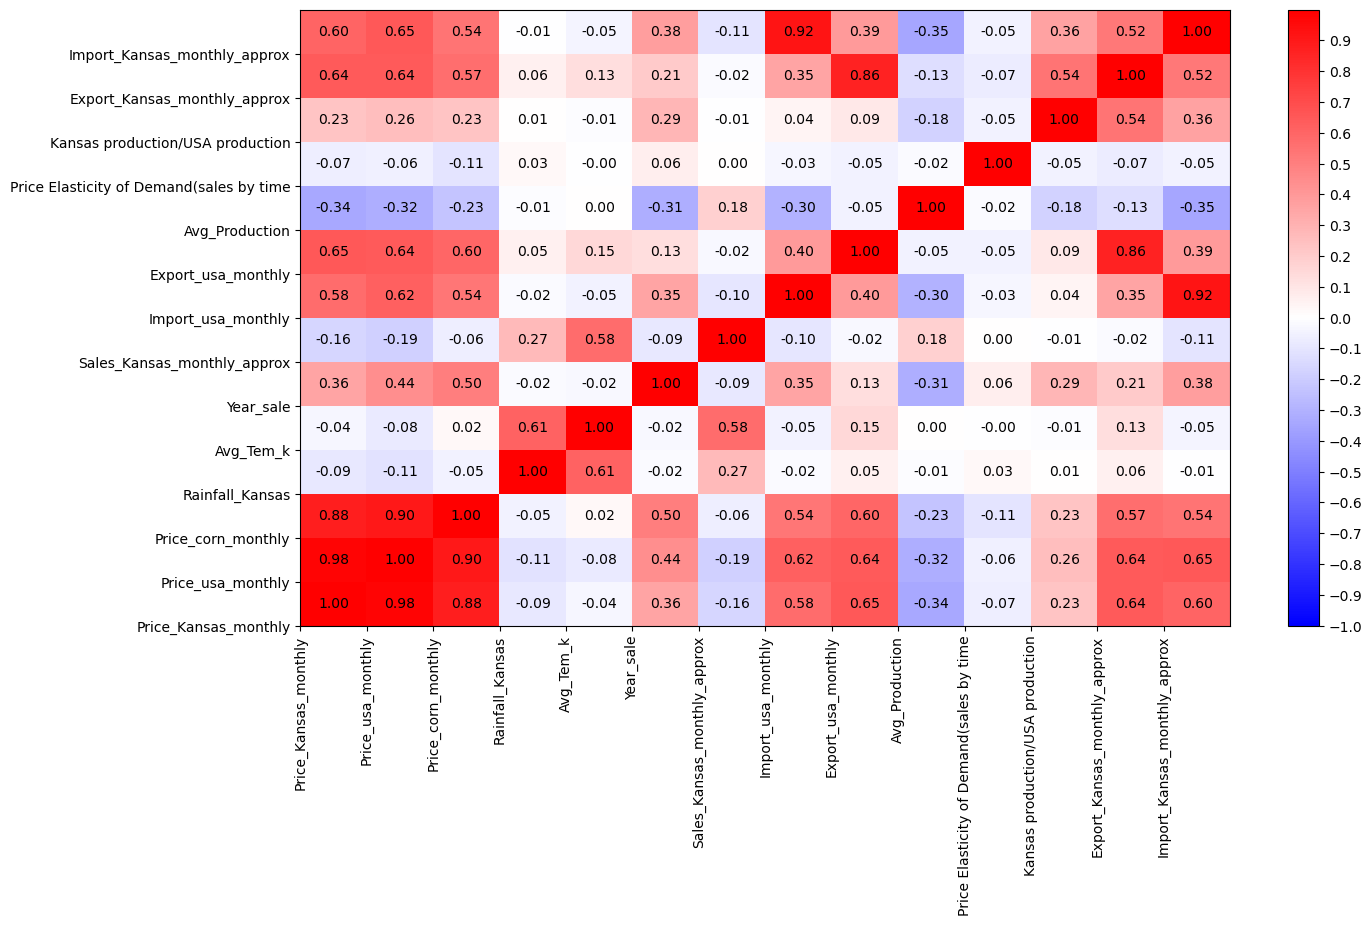

In [148]:
from matplotlib import colors
plt.figure(figsize=(15, 8))

correlation_matrix_2 =correlation_matrix.abs()  
plt.style.use('default')
#heatmap_type = plt.pcolor(correlation_matrix , cmap=plt.cm.Blues, vmin=-1, vmax=1)#pseudocolor plot,cmap (colormap) 
# plot the legend on the side#lengend is juts the colorbar, giving values for color intensity颜色深浅
#plt.colorbar(heatmap_type)
heatmap_type = plt.pcolor(correlation_matrix, cmap='bwr', norm=plt.Normalize(vmin=-1, vmax=1))
plt.colorbar(heatmap_type, ticks=np.arange(-1, 1, 0.1))#uses a diverging colormap ('bwr') with finer 0.1 intervals


#labels

label_l=column_name_2_numeric
ax_1 = plt.gca()#retreive current labels (object). The class object of ax_1 is matplotlib.axes.Axes,
#which is a subclass of matplotlib.artist.Artist in the inheritance hierarchy.
print(ax_1.get_xticklabels())#why alreay column_name_2??
#ax_1.set_xticks(ax.get_xticks())  # Keep original x positions
#ax_1.set_yticks(ax.get_yticks())  # Keep original y positions

ax_1.set_xticks(range(len(column_name_2_numeric))) # Set the x_label positions 0-16 without matching the original (automated) one, so x, y axes has loc:0,1,...,ln(column_name_2))
ax_1.set_yticks(range(len(column_name_2_numeric)))  # Set the y_ticket positions
ax_1.set_xticklabels(label_l,rotation='vertical') #sets  labels for the x-axis tickects,# and rortate the x_stick to be vertical to ve readable
ax_1.set_yticklabels(label_l)
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        val = correlation_matrix.iloc[i, j]
        plt.text(j + 0.5, i + 0.5, f"{val:.2f}", ha='center', va='center', color='black')



plt.show()

In [140]:
plt.figure(figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

## Explain 1 
- 1. Import and export have strong linear relationships with Price_Kansas_monthly.
  2. Rainfall_Kansas and Avg_Tem_k has strong (positive) linear relationship. So for dynamics need to consider them both.
  3. ‌Export_usa_monthly and  Import_usa_monthly has strong linear relationship. So global trend both import and export are similar.
  4. Rainfall and tempreture and sale has some positive relationship (**easy mkt dynamic example**). Rainfall should have relationship with prodcution but here it is averaged, so not very obvious. This is intermediate r.v. Usually, these two whether conditions have more relationship with production as it will shift supply as supply shock like 2022 drought and relatively higher temp in kansas. Then shift in supply curve (to the left) will influence quantity_saled (demanded) and price simultaneiously as equilibrium price increase, Q drops. (Expectation of demand also shift to the right)
  5. ‌Price_corn_monthly, Price_uwheat_monthly, and Price_kansas_monthly are closely related (linear)‌‌‌. This shows **substitution effect** of corn's price,and the price of state level are closely positively correlated to the aggrrefate level.
  6. Interesting thing: export of wheat has some positive linear relationship with kansas monthly corn price. As mentioned they are substitutions. Also export has linear relationship with all prices listed above. Export is one of the most important sale of wheat as a commodity crop.
  7. **Avg production** has negative linear relationship with all price factors and import. If supply increase, price will drop as explained before in the short run. Also sales (Q_d) almost has no linear relationship with price fatcors, may show Q_d inelastic, whicle supply is more elastic

   8. May use most factors listed above to do regression. The most important fatcor on Q_d and Q_s is not too lin related to price which confused me. They should work (maybe suggest non linear trend, like sin or cosin cyclical trend together with the global wheat price and may split up time zone to fit diff models


In [152]:
df_production_compare=pd.read_csv('df_production_compare.csv')
df_kansasdata_1_annual.head()

,Year,Price_Kansas_annual,Price_usa_annual,Price_corn_annual,Rainfall_Kansas_annual,Avg_Tem_k_annual,Import_usa_annual,Export_usa_annual,Annual_Production
0,2002,4.495000,4.443333,2.788333,2.365000,72.466667,146.040,2300.839,157.850000
1,2003,3.289167,3.445000,2.402500,2.092500,54.966667,122.313,3915.707,392.750000
2,2004,3.443333,3.568333,2.591667,2.575833,55.066667,160.895,5093.767,383.458333
3,2005,3.247500,3.359167,2.020833,2.466667,55.891667,172.197,4357.389,352.708333
4,2006,4.381667,4.033333,2.409167,2.060833,56.875000,309.607,4194.535,328.200000


In [154]:
correlation_matrix_annual_1 = df_kansasdata_1_annual.corr()
correlation_matrix_annual_1

,Year,Price_Kansas_annual,Price_usa_annual,Price_corn_annual,Rainfall_Kansas_annual,Avg_Tem_k_annual,Import_usa_annual,Export_usa_annual,Annual_Production
Year,1.000000,0.328742,0.414783,0.496450,-0.319500,-0.420747,0.307535,0.000864,-0.368051
Price_Kansas_annual,0.328742,1.000000,0.988855,0.923599,-0.274228,-0.044721,0.672724,0.679237,-0.217027
Price_usa_annual,0.414783,0.988855,1.000000,0.949594,-0.265067,-0.081079,0.697805,0.677587,-0.203342
Price_corn_annual,0.496450,0.923599,0.949594,1.000000,-0.366602,-0.127349,0.618561,0.620681,-0.173742
Rainfall_Kansas_annual,-0.319500,-0.274228,-0.265067,-0.366602,1.000000,0.532040,0.173085,0.277232,0.549156
Avg_Tem_k_annual,-0.420747,-0.044721,-0.081079,-0.127349,0.532040,1.000000,0.092358,0.213285,0.424598
Import_usa_annual,0.307535,0.672724,0.697805,0.618561,0.173085,0.092358,1.000000,0.725180,0.148705
Export_usa_annual,0.000864,0.679237,0.677587,0.620681,0.277232,0.213285,0.725180,1.000000,0.415908
Annual_Production,-0.368051,-0.217027,-0.203342,-0.173742,0.549156,0.424598,0.148705,0.415908,1.000000


[Text(0.0, 0, '0'), Text(1.0, 0, '1'), Text(2.0, 0, '2'), Text(3.0, 0, '3'), Text(4.0, 0, '4'), Text(5.0, 0, '5'), Text(6.0, 0, '6'), Text(7.0, 0, '7'), Text(8.0, 0, '8'), Text(9.0, 0, '9')]


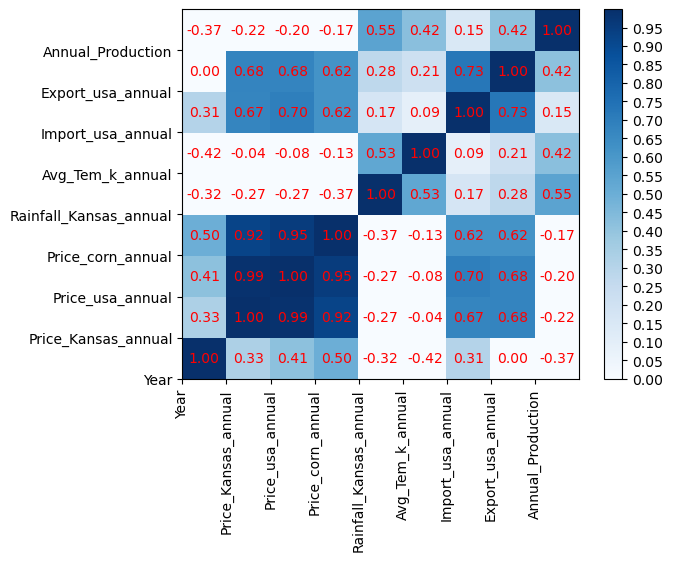

In [160]:

plt.style.use('default')
heatmap_type_2 = plt.pcolor(correlation_matrix_annual_1, cmap=plt.cm.Blues, vmin=0, vmax=1)#pseudocolor plot,cmap (colormap) 
# plot the legend on the side#lengend is juts the colorbar, giving values for color intensity颜色深浅
plt.colorbar(heatmap_type_2, ticks=np.arange(0, 1, 0.05))

#labels
column_name_2_annual=list(df_kansasdata_1_annual.axes[1])
label_2=column_name_2_annual

ax_2 = plt.gca()#retreive current labels (object). The class object of ax_1 is matplotlib.axes.Axes,
#which is a subclass of matplotlib.artist.Artist in the inheritance hierarchy.
print(ax_2.get_xticklabels())#why alreay column_name_2??
#ax_1.set_xticks(ax.get_xticks())  # Keep original x positions
#ax_1.set_yticks(ax.get_yticks())  # Keep original y positions

ax_2.set_xticks(range(len(column_name_2_annual))) # Set the x_label positions 0-16 without matching the original (automated) one, so x, y axes has loc:0,1,...,ln(column_name_2))
ax_2.set_yticks(range(len(column_name_2_annual)))  # Set the y_ticket positions
ax_2.set_xticklabels(label_2,rotation='vertical') #sets  labels for the x-axis tickects,# and rortate the x_stick to be vertical to ve readable
ax_2.set_yticklabels(label_2)
for i in range(correlation_matrix_annual_1.shape[0]):
    for j in range(correlation_matrix_annual_1.shape[1]):
        val = correlation_matrix_annual_1.iloc[i, j]
        plt.text(j + 0.5, i + 0.5, f"{val:.2f}", ha='center', va='center', color='red')


plt.show()

## Anuual explain
- 1. Avg_Production still has weaker linear reltaionship with other fatcors, but already higher. Note rainfall now has strong linear relationship to production.
  2. Most factros increase linear relationship as swapped to annual data. This implied that long run price trend is easier to use for wheat price in kansas.
  3. Avg_Tem_k has relationship with most factors, so avg tem is important for market dynamics.
  4. Rainfall_Kansas now stronger linear relationship with others.
  5. Long run supply is more elastic as shown above.

In [17]:
df_production_compare.index=df_production_compare['Year']
df_production_compare.drop('Year', axis=1, inplace=True)

In [18]:
df_part_kansasdata_1=df_kansasdata_1[['Time_plot','Price_Kansas_monthly', 'Price_usa_monthly',
                                      'Price_corn_monthly','Avg_Production', 'Avg_Tem_k', 'Rainfall_Kansas', 'Sales_Kansas_monthly_approx',  'Export_Kansas_monthly_approx', 'Import_Kansas_monthly_approx']]

df_part_kansasdata_1.columns = ['Time_plot','Price_Kansas', 'Price_usa_monthly',
                                      'Price_corn','Avg_Production', 'Avg_Tem_k', 'Rainfall_Kansas','Sales_Kansas',  'Export_Kansas_approx', 'Import_Kansas_approx']
df_part_kansasdata_1.index=df_part_kansasdata_1['Time_plot']
df_part_kansasdata_1.drop(columns=['Time_plot'], inplace=True)


C:\Users\yaoyuyang\AppData\Local\Temp\ipykernel_36116\977048552.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_part_kansasdata_1.drop(columns=['Time_plot'], inplace=True)


In [19]:
df_part_kansasdata_1

,Price_Kansas,Price_usa_monthly,Price_corn,Avg_Production,Avg_Tem_k,Rainfall_Kansas,Sales_Kansas,Export_Kansas_approx,Import_Kansas_approx
Time_plot,,,,,,,,,
2002-06-01,2.98,2.92,2.06,22.550000,76.9,2.74,75.76800,27.587429,3.081195
2002-07-01,3.27,3.21,2.22,22.550000,80.7,1.72,75.76800,36.649568,3.599200
2002-08-01,3.71,3.63,2.44,22.550000,78.4,3.09,32.47200,47.834887,2.526449
2002-09-01,4.33,4.21,2.49,22.550000,70.4,1.50,16.23600,39.857787,3.645847
2002-10-01,4.56,4.38,2.52,22.550000,50.5,4.43,10.82400,45.755971,2.250581
...,...,...,...,...,...,...,...,...,...
2024-09-01,5.32,5.36,4.04,25.620833,71.1,1.62,23.19850,119.372885,10.195456
2024-10-01,5.52,5.47,4.13,25.620833,62.4,0.91,16.49050,72.080204,13.811035
2024-11-01,5.42,5.45,4.25,25.620833,46.3,4.36,11.73900,65.894409,13.522991


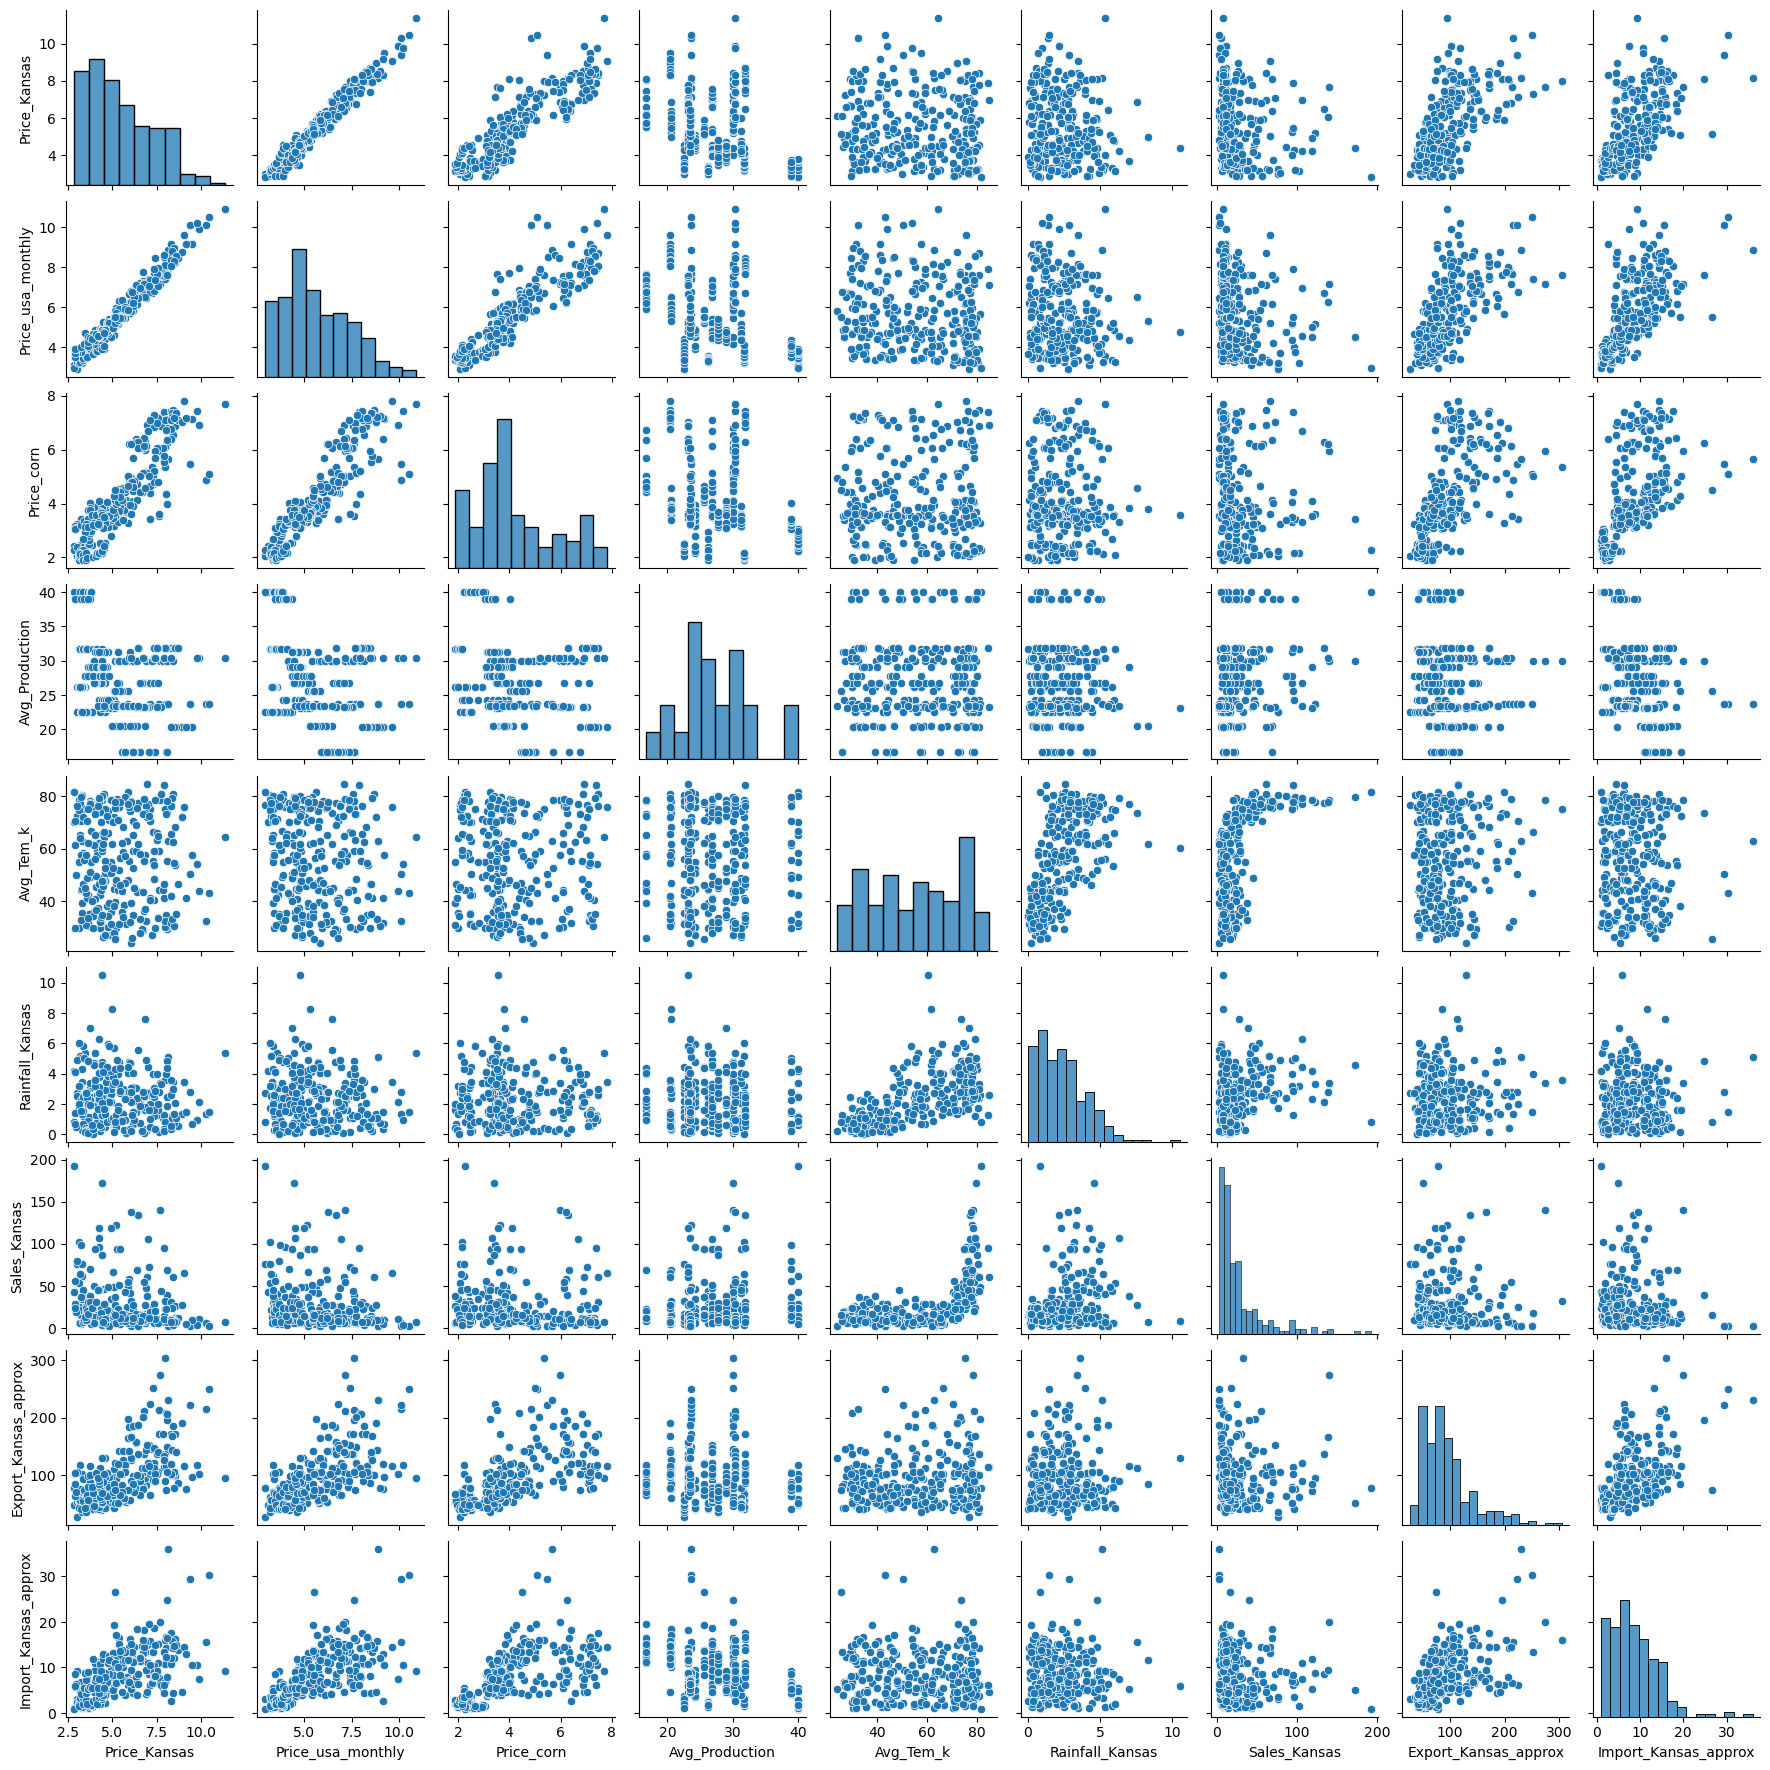

In [162]:
plt.rcParams['figure.figsize'] = (15, 10) 
sns.pairplot(df_part_kansasdata_1, height=2,  diag_kind="hist");
plt.show()

 Notes on pariplott
1. Price kansas has strong correlation with import and export usa.
2. Sales in Kansas and Avg_Temk's relationship can be expressed by polynomial regression. Will try sales with import, export, temp, and rainfall and so on.
3. Most patterns are explained before.Linear pattern for price and import/export. Useimport, export, avg_production, sales, and price factors.

# Part II individual factors relationsip visualization

In [21]:
df_price=df_kansasdata_1[['Time_plot','Price_Kansas_monthly', 'Price_usa_monthly', 'Price_corn_monthly']]
df_price.index=df_kansasdata_1['Time_plot']


In [22]:
df_price.drop('Time_plot', axis=1, inplace=True)
df_price.head()

C:\Users\yaoyuyang\AppData\Local\Temp\ipykernel_36116\457774002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price.drop('Time_plot', axis=1, inplace=True)


,Price_Kansas_monthly,Price_usa_monthly,Price_corn_monthly
Time_plot,,,
2002-06-01,2.98,2.92,2.06
2002-07-01,3.27,3.21,2.22
2002-08-01,3.71,3.63,2.44
2002-09-01,4.33,4.21,2.49
2002-10-01,4.56,4.38,2.52


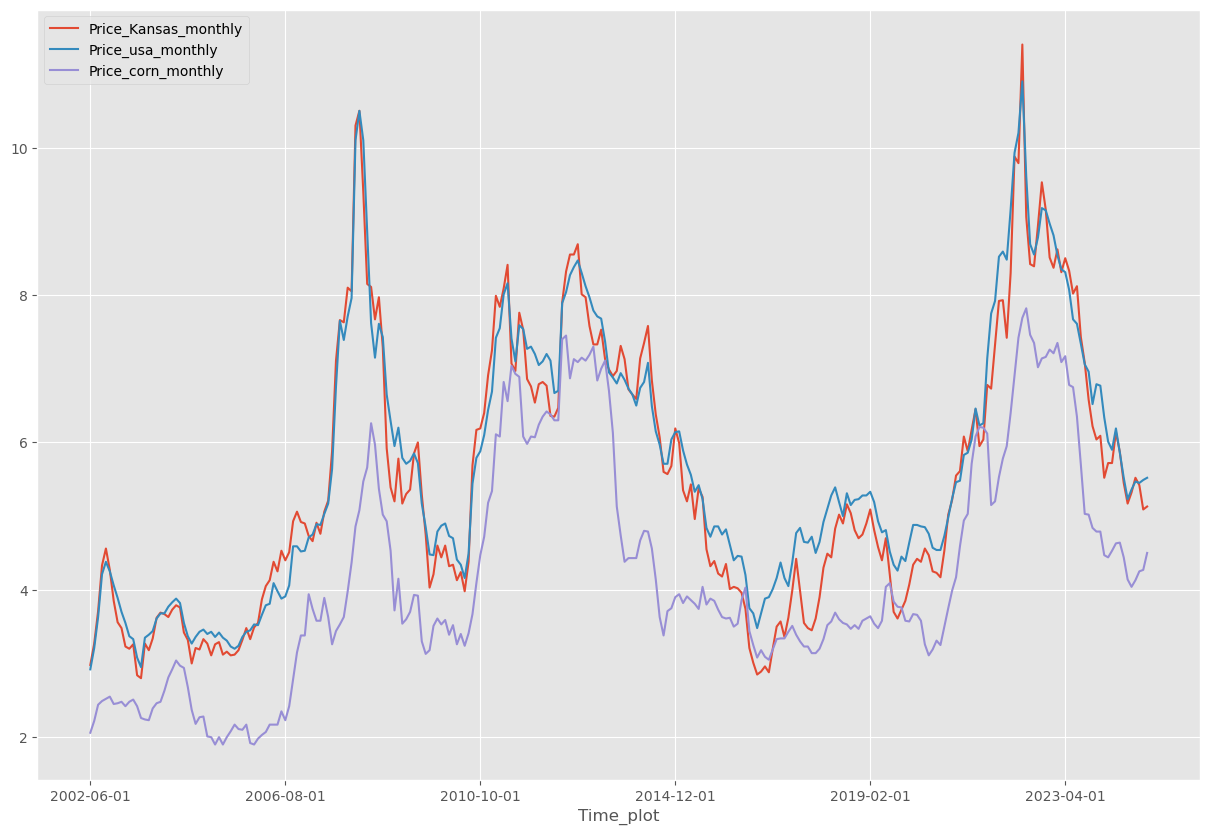

In [23]:
df_price.plot()
plt.show()

( This chart compares the monthly prices of wheat in Kansas, total wheat in the United States, and corn (as a substitute) from 2002 to 2024)
1.  **Strong correlation**: Kansas and US wheat prices are closely tracked, showing strong correlation and simultaneous peaks, especially during drastic price increases such as 2008 and 2022. This indicates that the wheat market in different states is tightly integrated.
2. **Alternative response**: Corn prices slightly lag behind wheat prices, but at the same time rise, especially during global shocks (such as 2008 (inflation), 2022 (global tension)), indicating substitution effects and shared input cost impacts.
3. **Relative price gap***: Wheat prices in Kansas are often slightly lower than or in line with the aggregate price in the United States, which may be due to lower transportation costs (Kansas do not need import wheat from other states, it supplys sufficient wheat every for themselves as the highest wheat production state), while the overall price of corn remains low and fluctuates less during specific periods.
4. These dynamics not only reflect interrelated markets affected by common macroeconomic shocks in field crop markets, but also reflect the economic concept general equilibrium price with relative markets.

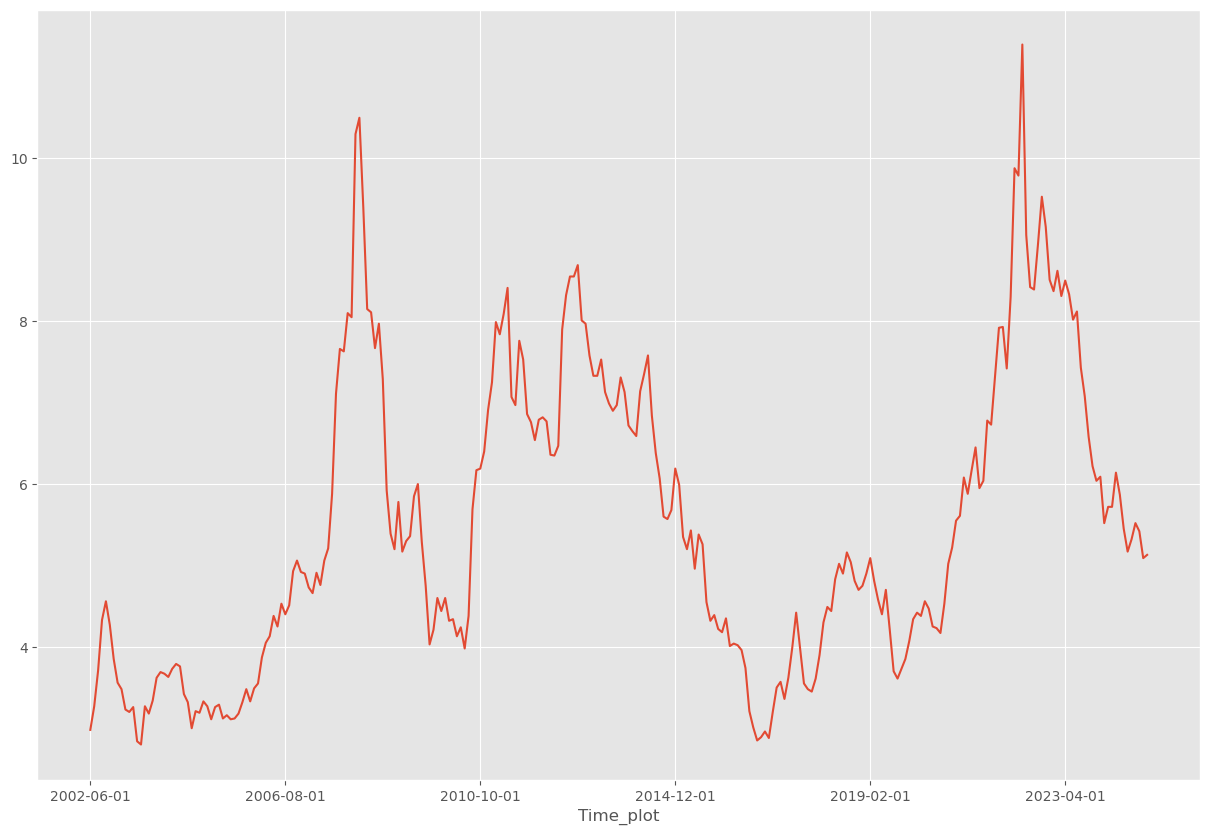

In [25]:
df_price['Price_Kansas_monthly'].plot()
plt.show()

In [26]:
df_weather_and_price=df_kansasdata_1[['Time_plot','Price_Kansas_monthly', 'Rainfall_Kansas', 'Avg_Tem_k','Sales_Kansas_monthly_approx',]]
df_weather_and_price.index=df_kansasdata_1['Time_plot']
df_weather_and_price.drop('Time_plot', axis=1, inplace=True)

C:\Users\yaoyuyang\AppData\Local\Temp\ipykernel_36116\804996564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_and_price.drop('Time_plot', axis=1, inplace=True)


In [28]:
plt.rcParams['figure.figsize'] = (10, 6) 

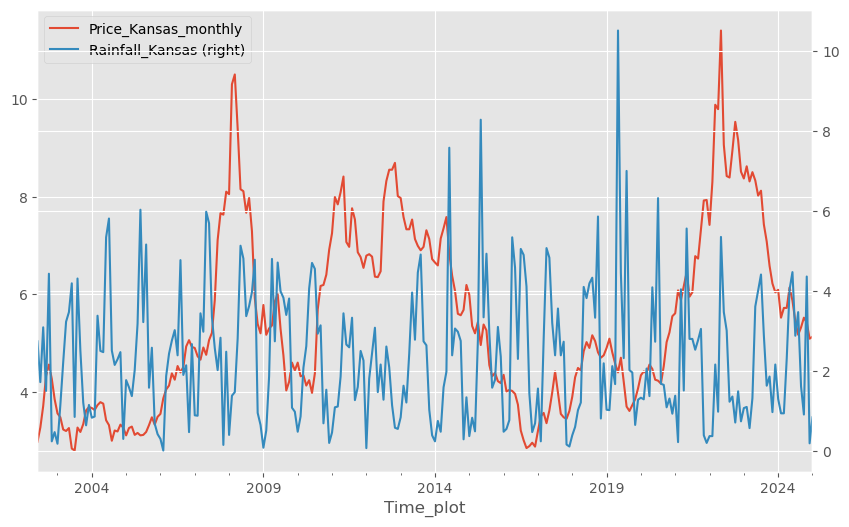

In [29]:
df_weather_and_price[['Price_Kansas_monthly', 'Rainfall_Kansas']].plot(secondary_y = ['Rainfall_Kansas'],grid = True)
plt.show()

Looks like the previous year's rainfall has a negative relation with the current price. Economically:
eThe previous year's rainfall creates a supply shock that shifts the supply curve of individual firms to the left, and then increasing the price, decreasing sales (Q_demanded)

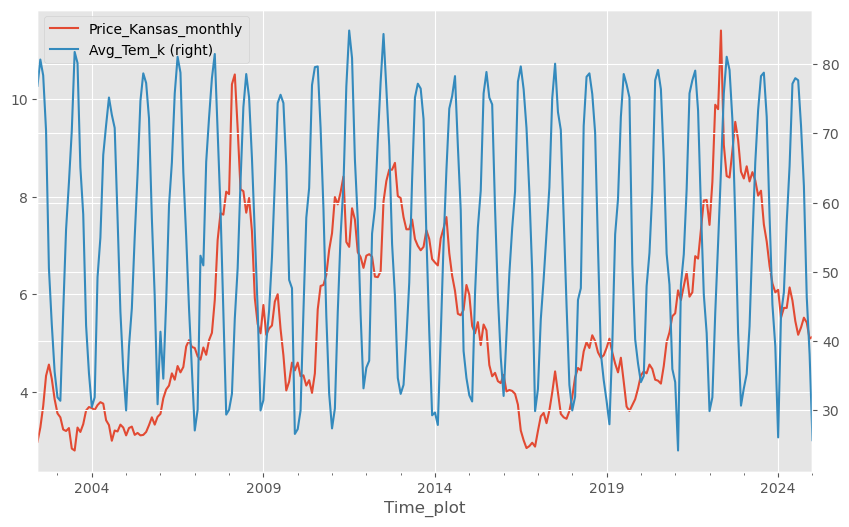

In [30]:
df_weather_and_price[['Price_Kansas_monthly', 'Avg_Tem_k']].plot(secondary_y = ['Avg_Tem_k'],grid = True)
plt.show()

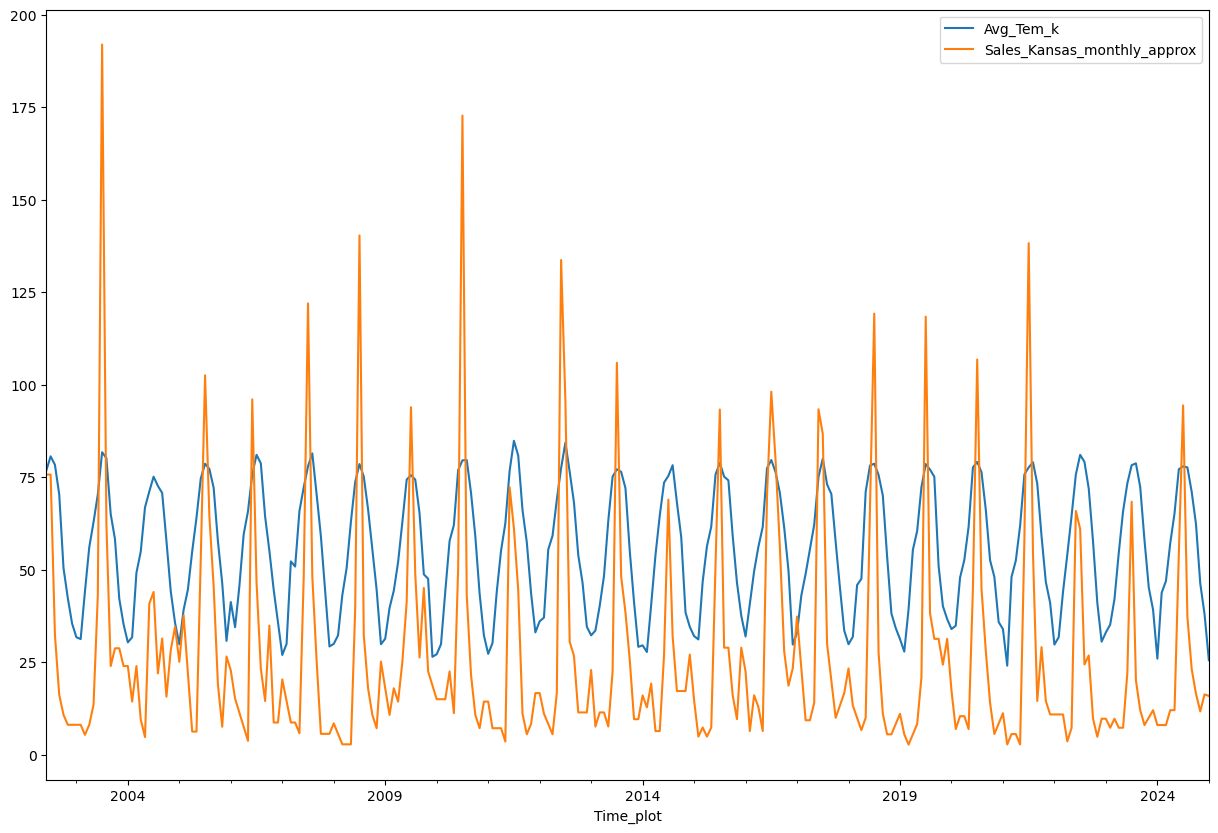

In [172]:
df_weather_and_price[[ 'Avg_Tem_k','Sales_Kansas_monthly_approx']].plot()
plt.show()

The peak of sales corresponds to the peak (summer) price each year, showing a similar seasonal pattern. sonNote that Kansas harvests in summer, so the peak is due to other factors and reasons, reminding we need to check calsal relationship.

In [31]:
df_price_sales_production=df_kansasdata_1[['Time_plot','Price_Kansas_monthly',]]
df_price_sales_production.index=df_kansasdata_1['Time_plot']
df_price_sales_production.drop('Time_plot', axis=1, inplace=True)


C:\Users\yaoyuyang\AppData\Local\Temp\ipykernel_36116\2738629097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_sales_production.drop('Time_plot', axis=1, inplace=True)


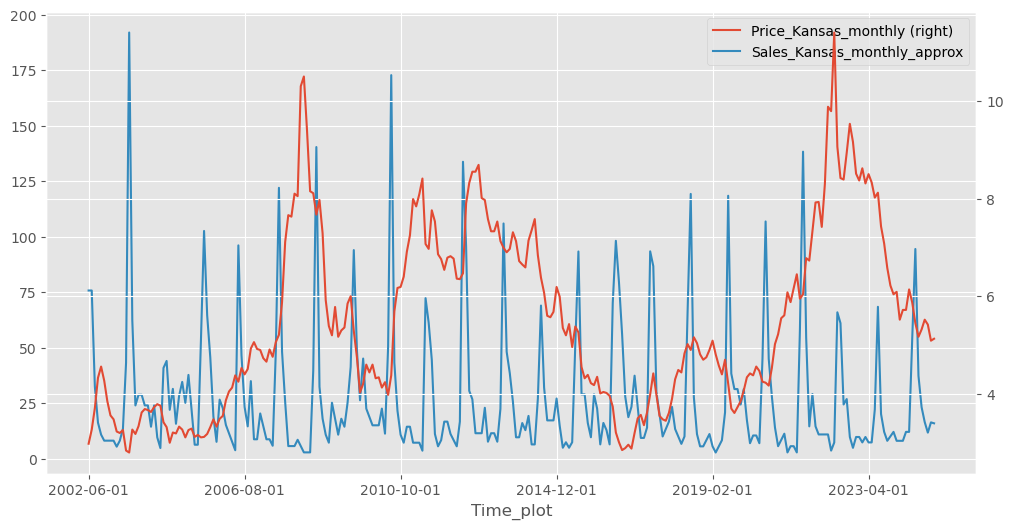

In [113]:
df_price_sales_production[['Price_Kansas_monthly', 'Sales_Kansas_monthly_approx']].plot(secondary_y = ['Price_Kansas_monthly'],grid = True)
#df_weather_and_price_sales.plot()
plt.show()

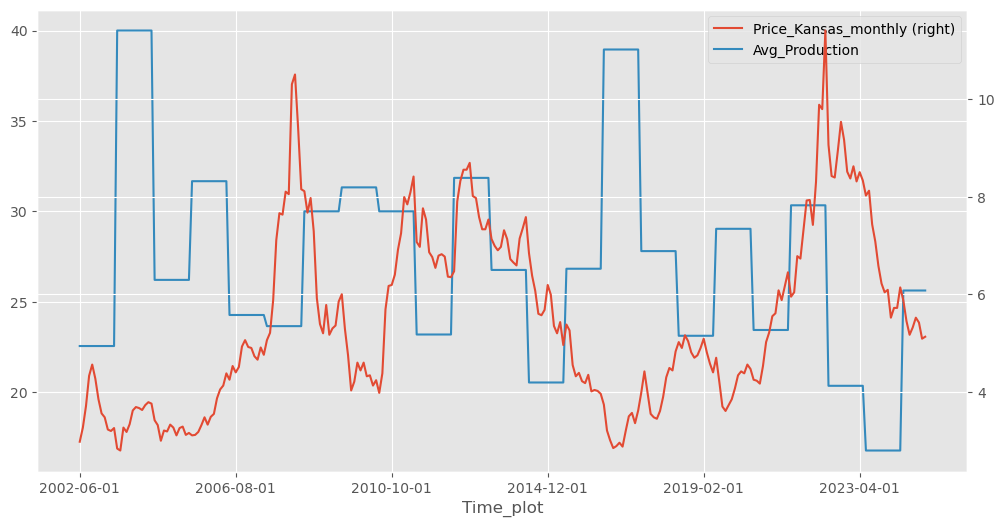

In [115]:
df_price_sales_production[['Price_Kansas_monthly', 'Avg_Production']].plot(secondary_y = ['Price_Kansas_monthly'],grid = True)
#df_weather_and_price_sales.plot()
plt.show()

Mostly as the total supply increases (previous several years), the price falls. This 2-is because of the right shift of the supply curve and future expectations
A price decrease shifts demand to the left, reducing the price. Except that 2012-2016 is not, above sales are relatively smaller, which means **less demand also decrease price**.

In [176]:
df_export_and_price=df_kansasdata_1[['Time_plot','Price_Kansas_monthly','Export_Kansas_monthly_approx']]
df_export_and_price.index=df_kansasdata_1['Time_plot']
df_export_and_price.drop('Time_plot', axis=1, inplace=True)

C:\Users\yaoyuyang\AppData\Local\Temp\ipykernel_36116\593638449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export_and_price.drop('Time_plot', axis=1, inplace=True)


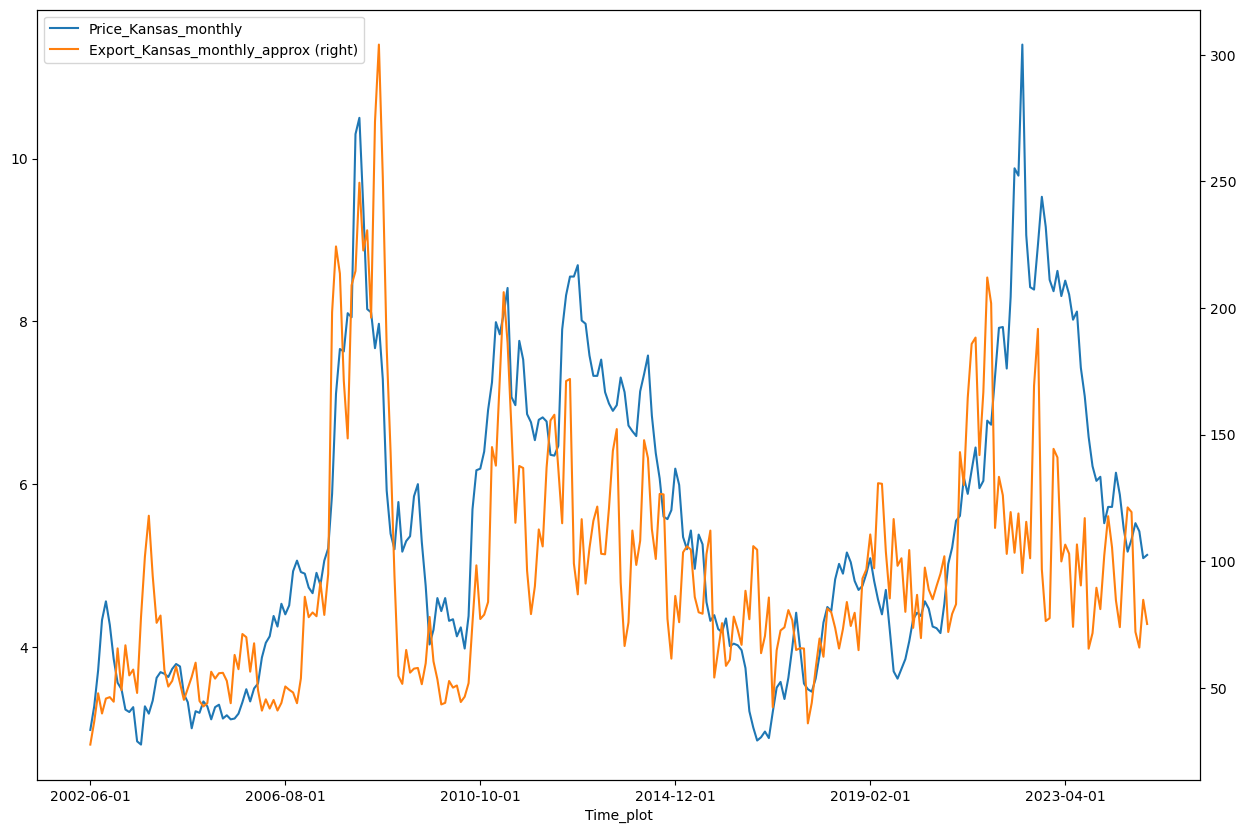

In [180]:
df_export_and_price.plot(secondary_y = ['Export_Kansas_monthly_approx'])
plt.show()

Higher prices are inversely related to lower exports, influenced by supply (such as rainfall affecting production) and external demand. Fluctuations reflect market dynamics that balance costs and trading volumes

In [33]:
from datetime import datetime
from scipy.signal import periodogram

In [34]:
sales_val = df_price_sales_production['Sales_Kansas_monthly_approx'].values
f, Pxx_den = periodogram(sales_val, fs=12, window="hamming")# fs=12 is like monthly data
# `Pxx_den` 是功率谱密度，表示 `cases` 信号中各个频率成分的能量分布情况。
#`Pxx_den` is the power spectral density of the signal, showing how power distributes over frequency components of `cases`.??


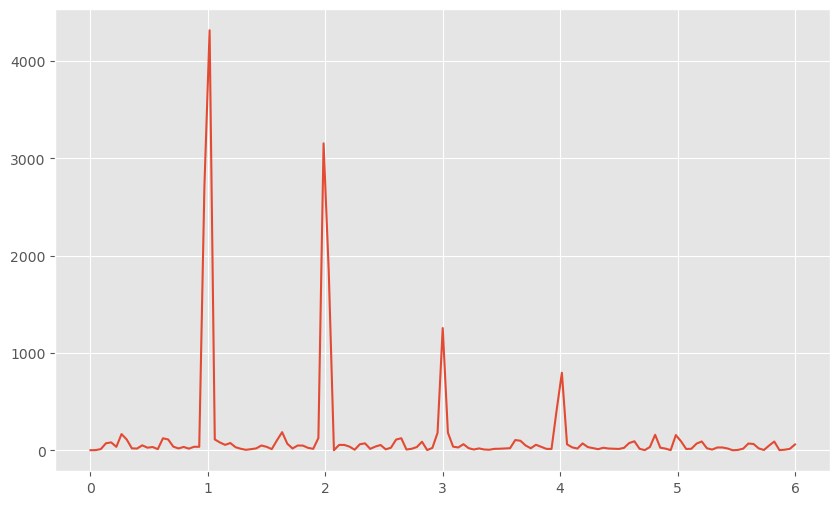

In [35]:
plt.plot(f, Pxx_den);
plt.show()

annual trend, halft year, and seasonal pattern in salses
1. Annual: affected by production, 
2. Half year: I relate the sales to production liek Jan-May last year's production (sales=PCT*corresponding production)
3. Seasonal:maybe because of sales and export strategries for farmersm not to sale at once or monthly 
or transportation logistics cycle (railway/port capacity allocation) strengthens sales band

## Part III time series prediction plots for price


In [39]:
from prophet import Prophet
date_l_range = pd.date_range(start='2002-06-01', end='2025-01-01', freq='MS') #https://www.geeksforgeeks.org/python-pandas-date_range-method/
df_prophet_1=pd.DataFrame({'ds': date_l_range, 'y': df_kansasdata_1 ['Price_Kansas_monthly']})
df_prophet_1.head()#desired df for using Prophet

,ds,y
0,2002-06-01,2.98
1,2002-07-01,3.27
2,2002-08-01,3.71
3,2002-09-01,4.33
4,2002-10-01,4.56


In [40]:
df_prophet_copy1=df_prophet_1
df_prophet_copy1.index=df_prophet_1['ds']

In [41]:
df_prophet_copy1.drop('ds', axis=1, inplace=True)


In [42]:
df_prophet_copy1

,y
ds,
2002-06-01,2.98
2002-07-01,3.27
2002-08-01,3.71
2002-09-01,4.33
2002-10-01,4.56
...,...
2024-09-01,5.32
2024-10-01,5.52
2024-11-01,5.42


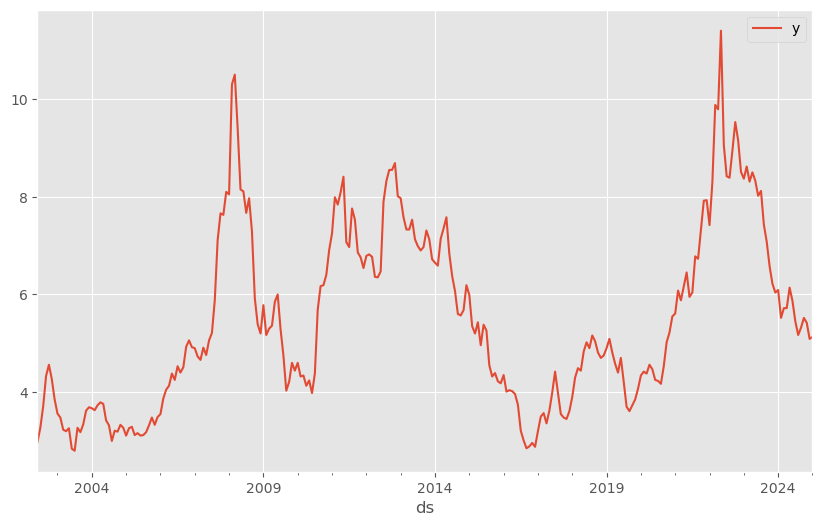

In [43]:
df_prophet_copy1.plot()
plt.show()

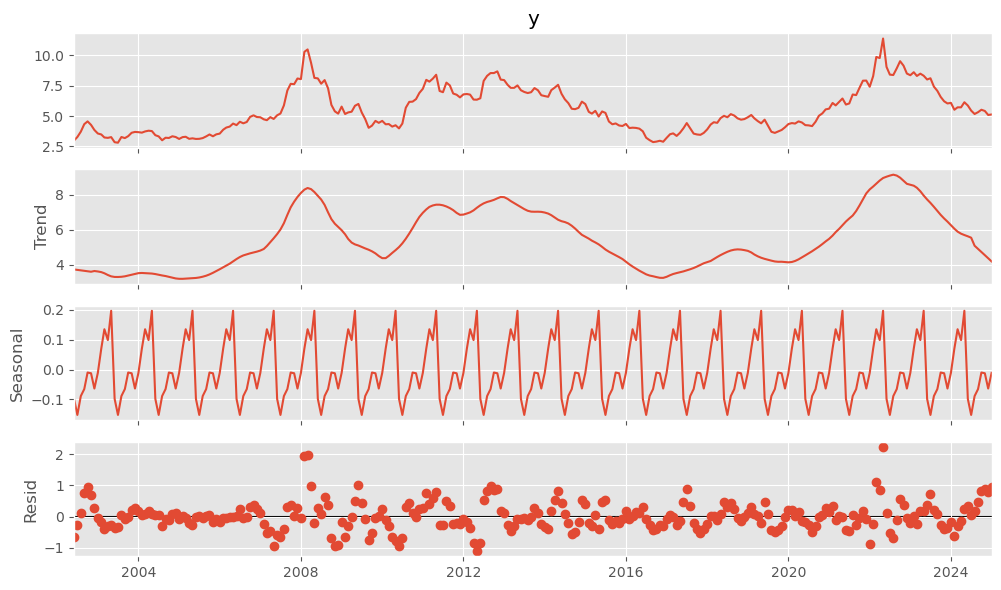

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_prophet_1['y'], model='additive', extrapolate_trend='freq', period=12)

decompose.plot()
plt.show()

1. Trends (first two panels):
This trend shows a long-term upward and downward cycle, especially peaking around 2008 and reaching another peak around 2022. This reflects the main price shock - possibly caused by economic or climate events - followed by a gradual decline, indicating a subsequent market adjustment or supply stability.
2. Seasonal (Group 3):
A clear and repetitive annual seasonal pattern is evident. Prices often rise in mid year months (around June to July) and fall around the end/beginning of each year (December to January). This may be related to the typical planting, harvesting, and export cycles in the agricultural market.
3. Residue (bottom plate):
The residuals display relatively small, randomly dispersed values, with occasional peaks, especially around 2008 and 2022. These indicate that trends or seasonality have not captured external shocks or events. The residuals are mostly stationary, indicating that the model fits well.

Through 'fixed components functions', classical seasonal decomposition is a bit **inaccurate** to data like dynamic wheat price, as it assumes that seasons and trend patterns repeat the same over time - with the same shape and period. Prophet is better because it allows for changes in trends and simulates non-linear seasonality, adapting to real-world changes like agricultural policy, climate, or market (supply) shocks, making it more flexible for complex economic data.

In [47]:
df_prophet_1['ds']=df_prophet_1.index
df_prophet_1

,y,ds
ds,,
2002-06-01,2.98,2002-06-01
2002-07-01,3.27,2002-07-01
2002-08-01,3.71,2002-08-01
2002-09-01,4.33,2002-09-01
2002-10-01,4.56,2002-10-01
...,...,...
2024-09-01,5.32,2024-09-01
2024-10-01,5.52,2024-10-01
2024-11-01,5.42,2024-11-01


In [48]:
model_prophet_1=Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, interval_width=0.95)
#95% CI, or making confidence level higher, defalt 80%
model_prophet_1.fit(df_prophet_1)

12:01:32 - cmdstanpy - INFO - Chain [1] start processing
12:01:32 - cmdstanpy - INFO - Chain [1] done processing


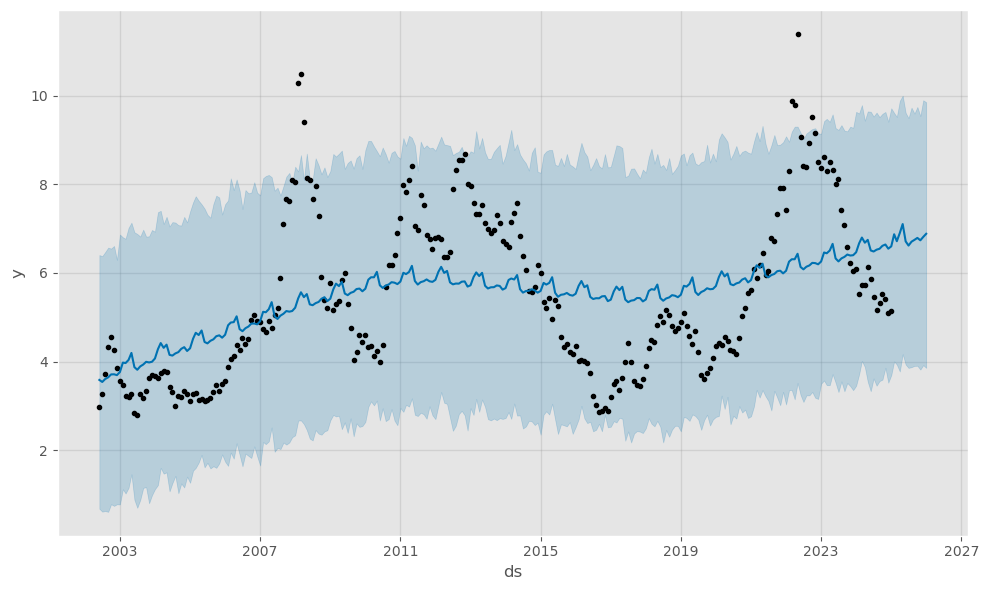

In [49]:
#future_1=model_prophet_1.make_future_dataframe(df_prophet_1, periods=12, freq='M')
future_1=model_prophet_1.make_future_dataframe(periods=12, freq='ME') #Feq='ME' the model forecasts 12 additional months beyond the training data
#https://www.rdocumentation.org/packages/prophet/versions/1.0/topics/make_future_dataframe
forecast_1=model_prophet_1.predict(future_1)
fig_prophet_1=model_prophet_1.plot(forecast_1)#explain later
plt.show()

## Explain
-1. Blue curve is the trend curve (with seasonal pattern), black dots are exact price, and blue shade region is for confidence bounds (interval).
-2. This prediction is accurate except a few outliers in 2022 (blue shaded region cpatured most except 3 points)
-3. The graph shows stead upward trend (linear)
-4. Below, 1st trend data without seasonal zigzag, 2nd graph is a particular montly trend pattern (with a bit zigzag).

In [51]:
from prophet.diagnostics import cross_validation#evaluate future 12 month prediction https://facebook.github.io/prophet/docs/diagnostics.html
df_eva_cross_val_pro_1= cross_validation(model_prophet_1, horizon='1095 days', period='180 days', initial='5840 days')# 16 years train, test from 2018.5
#ex initial is train data,by 9 years , gap between prediction is 30 days (a month), horizon is remaining 1 year, cutoff below is the cutoff point for my train test point

  0%|          | 0/8 [00:00<?, ?it/s]

12:01:32 - cmdstanpy - INFO - Chain [1] start processing
12:01:32 - cmdstanpy - INFO - Chain [1] done processing
12:01:33 - cmdstanpy - INFO - Chain [1] start processing
12:01:33 - cmdstanpy - INFO - Chain [1] done processing
12:01:33 - cmdstanpy - INFO - Chain [1] start processing
12:01:33 - cmdstanpy - INFO - Chain [1] done processing
12:01:34 - cmdstanpy - INFO - Chain [1] start processing
12:01:34 - cmdstanpy - INFO - Chain [1] done processing
12:01:34 - cmdstanpy - INFO - Chain [1] start processing
12:01:34 - cmdstanpy - INFO - Chain [1] done processing
12:01:35 - cmdstanpy - INFO - Chain [1] start processing
12:01:35 - cmdstanpy - INFO - Chain [1] done processing
12:01:36 - cmdstanpy - INFO - Chain [1] start processing
12:01:36 - cmdstanpy - INFO - Chain [1] done processing
12:01:37 - cmdstanpy - INFO - Chain [1] start processing
12:01:37 - cmdstanpy - INFO - Chain [1] done processing


In [52]:
df_eva_cross_val_pro_1

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-08-01,3.426795,1.057108,5.743710,5.16,2018-07-22
1,2018-09-01,3.374468,1.027987,5.684648,5.04,2018-07-22
2,2018-10-01,3.320137,0.979562,5.706011,4.81,2018-07-22
3,2018-11-01,3.255995,0.931136,5.571203,4.70,2018-07-22
4,2018-12-01,3.183315,1.005386,5.404099,4.75,2018-07-22
...,...,...,...,...,...,...
283,2024-09-01,4.188079,1.282400,6.880901,5.32,2022-01-02
284,2024-10-01,4.228047,1.525719,6.656502,5.52,2022-01-02
285,2024-11-01,4.271092,1.597990,6.965208,5.42,2022-01-02
286,2024-12-01,4.229632,1.563707,6.935382,5.09,2022-01-02


In [53]:
df_eva_cross_val_pro_1.to_csv('a.csv')

In [54]:
# above is predicted value of last yrar, now let us evaluate last year's performence 
from prophet.diagnostics import performance_metrics
metrics_eva_prophet_1 = performance_metrics(df_eva_cross_val_pro_1)
print(metrics_eva_prophet_1[['rmse', 'mape', 'mae']])# get diff values of metircs

         rmse      mape       mae
0    2.203012  0.281892  1.738730
1    2.206106  0.282486  1.742547
2    2.256188  0.288814  1.796112
3    2.381098  0.306632  1.938682
4    2.701137  0.322221  2.155947
..        ...       ...       ...
256  5.180840  0.621229  4.787177
257  5.237931  0.622550  4.845851
258  5.189029  0.617494  4.784698
259  5.022036  0.605680  4.605302
260  4.833830  0.584454  4.376737

[261 rows x 3 columns]


In [55]:
metrics_eva_prophet_1

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,109 days,4.853264,2.203012,1.738730,0.281892,0.292957,0.344332,0.714286
1,113 days,4.866902,2.206106,1.742547,0.282486,0.292957,0.345198,0.714286
2,114 days,5.090386,2.256188,1.796112,0.288814,0.308489,0.354535,0.678571
3,118 days,5.669629,2.381098,1.938682,0.306632,0.317741,0.378544,0.642857
4,119 days,7.296141,2.701137,2.155947,0.322221,0.328101,0.402648,0.607143
...,...,...,...,...,...,...,...,...
256,1084 days,26.841098,5.180840,4.787177,0.621229,0.709645,0.941362,0.142857
257,1085 days,27.435924,5.237931,4.845851,0.622550,0.710819,0.944524,0.142857
258,1089 days,26.926019,5.189029,4.784698,0.617494,0.710819,0.933957,0.142857
259,1091 days,25.220850,5.022036,4.605302,0.605680,0.709645,0.910313,0.178571


In [56]:
print(np.mean(metrics_eva_prophet_1[ 'mape'].values))

0.48793781920075235


In [57]:
from sklearn.metrics import r2_score
r2 = r2_score(df_eva_cross_val_pro_1['y'], df_eva_cross_val_pro_1['yhat'])
print(r2)

-3.4861069284251167


In [58]:
# one year
from prophet.diagnostics import cross_validation#evaluate future 12 month prediction https://facebook.github.io/prophet/docs/diagnostics.html
df_eva_cross_val_pro_2= cross_validation(model_prophet_1, horizon='365 days', period='30 days', initial='7300 days')
metrics_eva_prophet_2 = performance_metrics(df_eva_cross_val_pro_2)
print(np.mean(metrics_eva_prophet_2[ 'mape'].values))
r2_2 = r2_score(df_eva_cross_val_pro_2['y'], df_eva_cross_val_pro_2['yhat'])
print(r2)

  0%|          | 0/20 [00:00<?, ?it/s]

12:01:38 - cmdstanpy - INFO - Chain [1] start processing
12:01:38 - cmdstanpy - INFO - Chain [1] done processing
12:01:39 - cmdstanpy - INFO - Chain [1] start processing
12:01:39 - cmdstanpy - INFO - Chain [1] done processing
12:01:39 - cmdstanpy - INFO - Chain [1] start processing
12:01:39 - cmdstanpy - INFO - Chain [1] done processing
12:01:40 - cmdstanpy - INFO - Chain [1] start processing
12:01:40 - cmdstanpy - INFO - Chain [1] done processing
12:01:40 - cmdstanpy - INFO - Chain [1] start processing
12:01:40 - cmdstanpy - INFO - Chain [1] done processing
12:01:41 - cmdstanpy - INFO - Chain [1] start processing
12:01:41 - cmdstanpy - INFO - Chain [1] done processing
12:01:41 - cmdstanpy - INFO - Chain [1] start processing
12:01:41 - cmdstanpy - INFO - Chain [1] done processing
12:01:42 - cmdstanpy - INFO - Chain [1] start processing
12:01:42 - cmdstanpy - INFO - Chain [1] done processing
12:01:43 - cmdstanpy - INFO - Chain [1] start processing
12:01:43 - cmdstanpy - INFO - Chain [1]

0.28983328019849036
-3.4861069284251167


In [59]:
df_eva_cross_val_pro_2

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-07-01,5.750577,2.897155,8.471401,8.42,2022-06-11
1,2022-08-01,5.880818,3.147540,8.493407,8.39,2022-06-11
2,2022-09-01,5.907628,3.222632,8.461831,8.94,2022-06-11
3,2022-10-01,5.962612,3.610811,8.928099,9.53,2022-06-11
4,2022-11-01,5.987942,3.279939,8.776838,9.16,2022-06-11
...,...,...,...,...,...,...
235,2024-09-01,7.918608,5.217372,10.605784,5.32,2024-01-02
236,2024-10-01,7.996982,5.389803,10.716774,5.52,2024-01-02
237,2024-11-01,8.070675,5.209983,10.628512,5.42,2024-01-02
238,2024-12-01,8.019008,5.341871,10.648122,5.09,2024-01-02


In [60]:
df_eva_cross_val_pro_2.to_csv('a2.csv')

In [61]:
metrics_eva_prophet_2.to_csv('c1.csv')

In [62]:
horizons_list = ['30 days', '365 days', '730 days', '1095 days']#3 month, 1,2,3 years
for horizon in horizons_list :
    df_eva_cross_val_pro_3 = cross_validation(model_prophet_1, horizon=horizon, period='180 days', initial='3285 days')
    metrics_eva_prophet_3 = performance_metrics(df_eva_cross_val_pro_3)
    print(f"Horizon: {horizon}, MAPE: {np.mean(metrics_eva_prophet_3['mape'].values)}")
    r2_3 = r2_score(df_eva_cross_val_pro_3['y'], df_eva_cross_val_pro_3['yhat'])
    print(f"R²: {r2_3}")


  0%|          | 0/28 [00:00<?, ?it/s]

12:01:50 - cmdstanpy - INFO - Chain [1] start processing
12:01:50 - cmdstanpy - INFO - Chain [1] done processing
12:01:51 - cmdstanpy - INFO - Chain [1] start processing
12:01:51 - cmdstanpy - INFO - Chain [1] done processing
12:01:51 - cmdstanpy - INFO - Chain [1] start processing
12:01:52 - cmdstanpy - INFO - Chain [1] done processing
12:01:52 - cmdstanpy - INFO - Chain [1] start processing
12:01:52 - cmdstanpy - INFO - Chain [1] done processing
12:01:52 - cmdstanpy - INFO - Chain [1] start processing
12:01:52 - cmdstanpy - INFO - Chain [1] done processing
12:01:52 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1] done processing
12:01:53 - cmdstanpy - INFO - Chain [1] start processing
12:01:53 - cmdstanpy - INFO - Chain [1]

Horizon: 30 days, MAPE: 0.28391817595121227
R²: -0.0639299309838377


  0%|          | 0/26 [00:00<?, ?it/s]

12:01:59 - cmdstanpy - INFO - Chain [1] start processing
12:01:59 - cmdstanpy - INFO - Chain [1] done processing
12:01:59 - cmdstanpy - INFO - Chain [1] start processing
12:01:59 - cmdstanpy - INFO - Chain [1] done processing
12:02:00 - cmdstanpy - INFO - Chain [1] start processing
12:02:00 - cmdstanpy - INFO - Chain [1] done processing
12:02:00 - cmdstanpy - INFO - Chain [1] start processing
12:02:00 - cmdstanpy - INFO - Chain [1] done processing
12:02:00 - cmdstanpy - INFO - Chain [1] start processing
12:02:00 - cmdstanpy - INFO - Chain [1] done processing
12:02:00 - cmdstanpy - INFO - Chain [1] start processing
12:02:00 - cmdstanpy - INFO - Chain [1] done processing
12:02:01 - cmdstanpy - INFO - Chain [1] start processing
12:02:01 - cmdstanpy - INFO - Chain [1] done processing
12:02:01 - cmdstanpy - INFO - Chain [1] start processing
12:02:01 - cmdstanpy - INFO - Chain [1] done processing
12:02:01 - cmdstanpy - INFO - Chain [1] start processing
12:02:01 - cmdstanpy - INFO - Chain [1]

Horizon: 365 days, MAPE: 0.33262782147235
R²: -0.6133392482281683


  0%|          | 0/24 [00:00<?, ?it/s]

12:02:05 - cmdstanpy - INFO - Chain [1] start processing
12:02:05 - cmdstanpy - INFO - Chain [1] done processing
12:02:05 - cmdstanpy - INFO - Chain [1] start processing
12:02:05 - cmdstanpy - INFO - Chain [1] done processing
12:02:06 - cmdstanpy - INFO - Chain [1] start processing
12:02:06 - cmdstanpy - INFO - Chain [1] done processing
12:02:06 - cmdstanpy - INFO - Chain [1] start processing
12:02:06 - cmdstanpy - INFO - Chain [1] done processing
12:02:06 - cmdstanpy - INFO - Chain [1] start processing
12:02:06 - cmdstanpy - INFO - Chain [1] done processing
12:02:07 - cmdstanpy - INFO - Chain [1] start processing
12:02:07 - cmdstanpy - INFO - Chain [1] done processing
12:02:07 - cmdstanpy - INFO - Chain [1] start processing
12:02:07 - cmdstanpy - INFO - Chain [1] done processing
12:02:07 - cmdstanpy - INFO - Chain [1] start processing
12:02:07 - cmdstanpy - INFO - Chain [1] done processing
12:02:08 - cmdstanpy - INFO - Chain [1] start processing
12:02:08 - cmdstanpy - INFO - Chain [1]

Horizon: 730 days, MAPE: 0.4219735090648001
R²: -1.31646072608594


  0%|          | 0/22 [00:00<?, ?it/s]

12:02:12 - cmdstanpy - INFO - Chain [1] start processing
12:02:12 - cmdstanpy - INFO - Chain [1] done processing
12:02:12 - cmdstanpy - INFO - Chain [1] start processing
12:02:12 - cmdstanpy - INFO - Chain [1] done processing
12:02:12 - cmdstanpy - INFO - Chain [1] start processing
12:02:12 - cmdstanpy - INFO - Chain [1] done processing
12:02:13 - cmdstanpy - INFO - Chain [1] start processing
12:02:13 - cmdstanpy - INFO - Chain [1] done processing
12:02:13 - cmdstanpy - INFO - Chain [1] start processing
12:02:13 - cmdstanpy - INFO - Chain [1] done processing
12:02:13 - cmdstanpy - INFO - Chain [1] start processing
12:02:13 - cmdstanpy - INFO - Chain [1] done processing
12:02:13 - cmdstanpy - INFO - Chain [1] start processing
12:02:13 - cmdstanpy - INFO - Chain [1] done processing
12:02:14 - cmdstanpy - INFO - Chain [1] start processing
12:02:14 - cmdstanpy - INFO - Chain [1] done processing
12:02:14 - cmdstanpy - INFO - Chain [1] start processing
12:02:14 - cmdstanpy - INFO - Chain [1]

Horizon: 1095 days, MAPE: 0.5263381995649695
R²: -2.2751531898217143


In [63]:
df_eva_cross_val_pro_3#cutoff is the date the model stopped training, ds is the date, y true val

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-09-01,6.989431,4.410891,9.486336,7.53,2011-08-28
1,2011-10-01,7.019839,4.141442,9.683623,6.86,2011-08-28
2,2011-11-01,7.028852,4.428340,9.794088,6.76,2011-08-28
3,2011-12-01,7.054805,4.321802,9.755994,6.54,2011-08-28
4,2012-01-01,7.125960,4.526920,9.651200,6.79,2011-08-28
...,...,...,...,...,...,...
787,2024-09-01,4.188079,1.461651,6.746176,5.32,2022-01-02
788,2024-10-01,4.228047,1.382489,7.002969,5.52,2022-01-02
789,2024-11-01,4.271092,1.563666,6.721369,5.42,2022-01-02
790,2024-12-01,4.229632,1.644309,7.029438,5.09,2022-01-02


Ornstein-Uhlenbeck process using Neural SDE:
https://github.com/google-research/torchsde

# rolling forecast (row by period which is 30 days which is entry by entry here my data is monthly)
The rmse and mae colose to 0 is accurate. And mape close to 0% is good. The valuation score looks not perfect. I will fix it and optimiaze later (in analysis I suppose this part for recent 3 block of code is for analysis). We may break into diff pieces to try this for the final submission version.
Having 270 data points is better than 121 data points as rolling forcast, now it works better

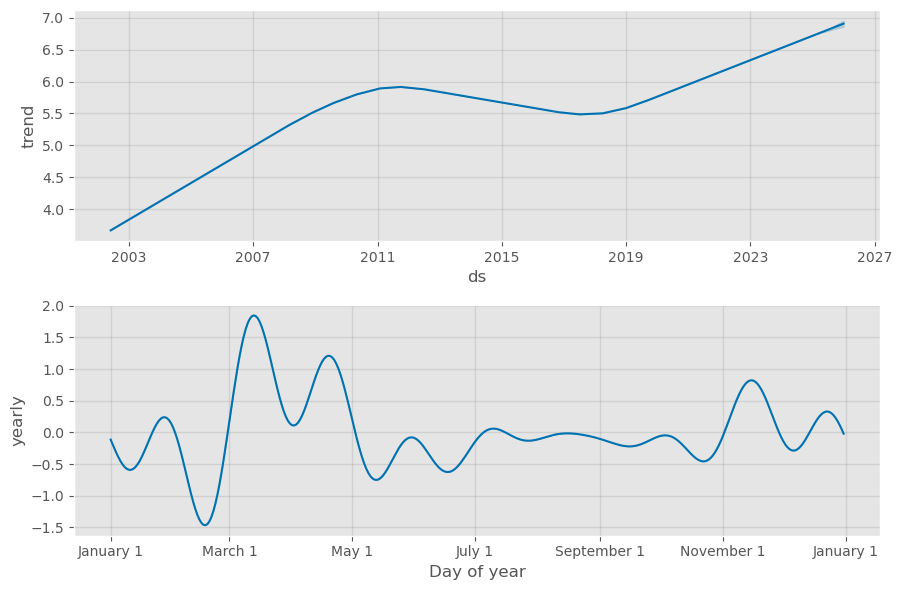

In [66]:
fig_prophet_2=model_prophet_1.plot_components(forecast_1)#explain later
plt.show()

1. Looks like linear trend but with a bit rate changing
2. for monthly, Feb is higher, but later a 20 year peiord monthly trend, more exact seasonal patterm (12 a bit higher, 1-5 higher)

Why does it look different (50 words):
Prophet uses an additive and flexible trend model suitable for changing slope points, which differs from the classical decomposition that assumes fixed components. The trend here changed around 2015-2018, with a slight plateau before rising again. Seasonal components are smoother, allowing for non-linear patterns and more flexible capture of peak periods from March to April and mini-cycles at the end of the year.

Conclusion (50 words):
The Prophet model shows that wheat prices are steadily rising, with a mid-decade growth pause. Seasonality indicates that prices rose strongly from March to April, then fluctuated less for the rest of the year. Compared to classical decomposition, Prophet better captures structural changes and asymmetric annual behavior, which is useful for making predictions under uncertainty or policy evaluation.

In [69]:
from scipy.stats import lognorm #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html
column_name_phrophet_1=list(forecast_1.axes[1])
print("head:",column_name_phrophet_1)
forecast_1.tail()

head: ['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat']


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
279,2025-08-31,6.842237,3.901464,9.600044,6.813827,6.869827,-0.093922,-0.093922,-0.093922,-0.093922,-0.093922,-0.093922,0.0,0.0,0.0,6.748315
280,2025-09-30,6.857881,3.904285,9.749515,6.825111,6.890238,-0.065797,-0.065797,-0.065797,-0.065797,-0.065797,-0.065797,0.0,0.0,0.0,6.792084
281,2025-10-31,6.874046,3.817230,9.543191,6.835085,6.912263,-0.136258,-0.136258,-0.136258,-0.136258,-0.136258,-0.136258,0.0,0.0,0.0,6.737788
282,2025-11-30,6.889690,3.918366,9.900796,6.845121,6.933778,-0.076115,-0.076115,-0.076115,-0.076115,-0.076115,-0.076115,0.0,0.0,0.0,6.813575
283,2025-12-31,6.905855,3.855957,9.855708,6.855411,6.954668,-0.020669,-0.020669,-0.020669,-0.020669,-0.020669,-0.020669,0.0,0.0,0.0,6.885187


## df
- **explain title of column**:
-  additive_terms: Additional components (seasonality, holidays)
- y_hat (final predicted value): trend + additive_terms + multiplicative_terms (none multiplicative here). The blue line in 1st picture
- ‌yhat_lower/yhat_upper‌：predicted vlaue CI. The blue shaded region in 1st picture
- yearly:  annual seasonal trend pattern (e.g., winter peaks, summer fall lower data points),this is incorporated to  additive_terms (this is why prophet is strong to predict price trend)
-last 11 (rows) months are predicted vlaues.

In [71]:
y_trend_1=forecast_1['trend']
#shape, loc, scale = lognorm.fit(y_trend_1, floc=0)
#x_trend_1=np.linspace(, , len(y_trend_1))
df_log_1 = pd.DataFrame(y_trend_1)
df_log_1['log_price_trend']=np.log(df_log_1['trend'])# log transformation to linear,and add this column afraid of exponentioal trend
df_log_1['x'] = np.arange(1, len(df_log_1) + 1)
y_trend_ols_1=sm.ols(formula="log_price_trend~ x ", data=df_log_1).fit()
y_trend_ols_1.rsquared

0.726682078357087

In [72]:
#plt.plot(df_log_1.index, df_log_1['log_price_trend'], color='green')
plt.scatter(x=df_log_1.index,y=df_log_1['log_price_trend'],c='r',marker='s')#very nice liinear pattern
plt.plot(df_log_1.index,y_trend_ols_1.predict(),color='blue',linewidth=1)#y should have same index has x

#plt.show()


In [73]:
df_original_1=pd.DataFrame(y_trend_1)
df_original_1['x'] = np.arange(1, len(df_log_1) + 1)
y_trend_ols_1_2 = sm.ols(formula="trend~ x ", data=df_original_1).fit()
y_trend_ols_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trend   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     873.6
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           2.32e-88
Time:                        12:02:18   Log-Likelihood:                -114.34
No. Observations:                 284   AIC:                             232.7
Df Residuals:                     282   BIC:                             240.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4468      0.043    102.892      0.000       4.362       4.532
x              0.0078      0.000     29.557      0.000       0.007       0.008
==============================================================================
Omnibus:                       35.881   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.303
Skew:                           0.083   Prob(JB):                      0.00579
Kurtosis:                       2.082   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

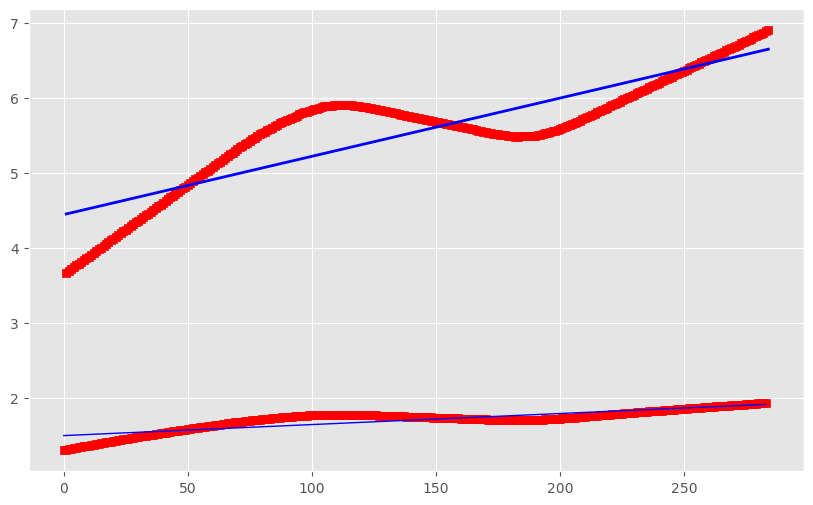

In [74]:
plt.scatter(x=df_original_1['x'] ,y=df_original_1['trend'],c='r',marker='s')#very nice liinear pattern
plt.plot(df_original_1['x'] ,y_trend_ols_1_2.predict(),color='blue',linewidth=2)#y should have same index has x

plt.show()

R^sqaure is around 0.980 and F statsitic p-val is very small, and the intercept and coef's p-val very small. **linear trend** given by Prophet model.

In [76]:
model_prophet_non_lin_1=Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, interval_width=0.95, growth='logistic')
#logistivc for non linear trend
df_prophet_1['cap'] = 10# max forecasted values cannot exceed 10 (remove one outlier 13 in origial dataset)

model_prophet_non_lin_1.fit(df_prophet_1)


12:02:18 - cmdstanpy - INFO - Chain [1] start processing
12:02:18 - cmdstanpy - INFO - Chain [1] done processing


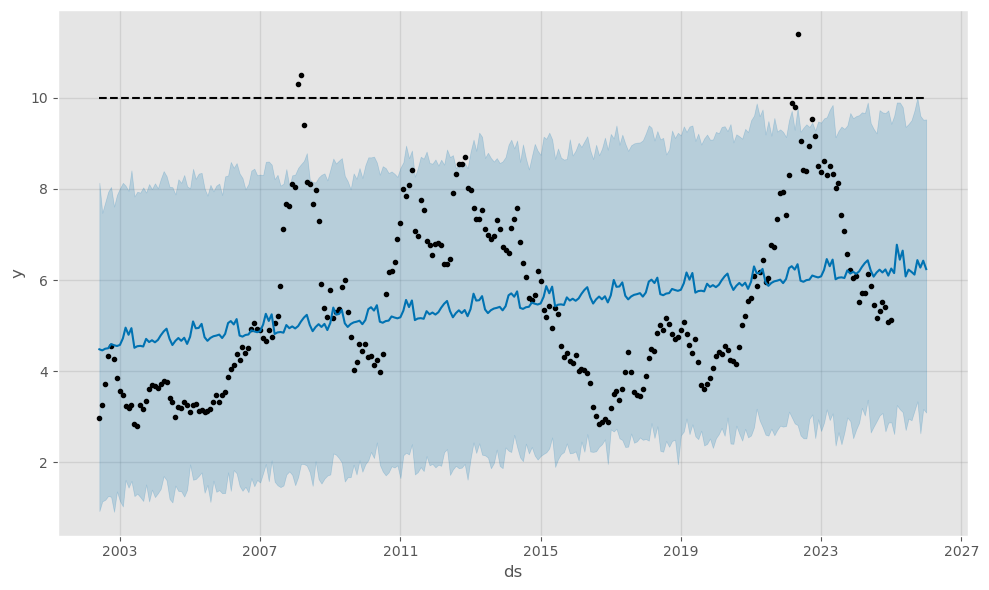

In [77]:
future_1_non_l=model_prophet_non_lin_1.make_future_dataframe(periods=12, freq='ME')

future_1_non_l['cap'] = 10
forecast_1_non_l=model_prophet_non_lin_1.predict(future_1_non_l)#need to add cap before prediction
fig_prophet_non_l_1=model_prophet_non_lin_1.plot(forecast_1_non_l)#explain later
plt.show()

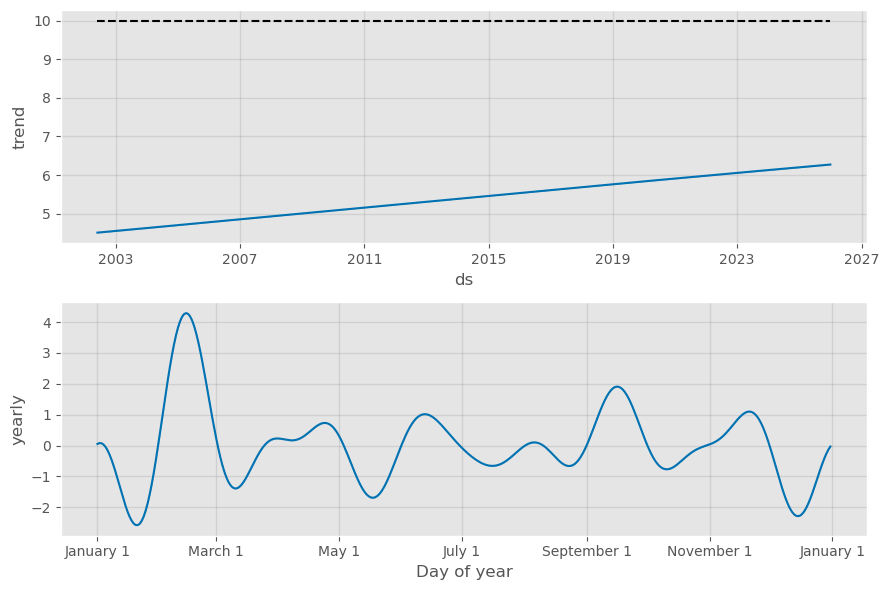

In [78]:
fig_prophet_non_l_2=model_prophet_non_lin_1.plot_components(forecast_1_non_l)
plt.show()

get a cap will flatten the trend data here, excluding outliers noise leaving only linear drift

In [80]:
y_trend_nonl_1=forecast_1_non_l['trend']
df_original_nonl_1=pd.DataFrame(y_trend_nonl_1)
df_original_nonl_1['x'] = np.arange(1, len(df_original_nonl_1) + 1)
y_trend_ols_nonl_1 = sm.ols(formula="trend~ x ", data=df_original_nonl_1).fit()
y_trend_ols_nonl_1.rsquared

0.9999379183876436

In [81]:
horizons_list2 = ['90 days', '365 days']#3 month, 1 years
for horizon in horizons_list2 :
    df_eva_cross_val_pro_4 = cross_validation(model_prophet_non_lin_1, horizon=horizon, period='180 days', initial='3285 days')
    metrics_eva_prophet_4 = performance_metrics(df_eva_cross_val_pro_3)
    print(f"Horizon: {horizon}, MAPE: {np.mean(metrics_eva_prophet_4['mape'].values)}")
    r2_4 = r2_score(df_eva_cross_val_pro_4['y'], df_eva_cross_val_pro_4['yhat'])
    print(f"R²: {r2_4}")

  0%|          | 0/28 [00:00<?, ?it/s]

12:02:20 - cmdstanpy - INFO - Chain [1] start processing
12:02:20 - cmdstanpy - INFO - Chain [1] done processing
12:02:21 - cmdstanpy - INFO - Chain [1] start processing
12:02:21 - cmdstanpy - INFO - Chain [1] done processing
12:02:21 - cmdstanpy - INFO - Chain [1] start processing
12:02:21 - cmdstanpy - INFO - Chain [1] done processing
12:02:21 - cmdstanpy - INFO - Chain [1] start processing
12:02:21 - cmdstanpy - INFO - Chain [1] done processing
12:02:22 - cmdstanpy - INFO - Chain [1] start processing
12:02:22 - cmdstanpy - INFO - Chain [1] done processing
12:02:22 - cmdstanpy - INFO - Chain [1] start processing
12:02:22 - cmdstanpy - INFO - Chain [1] done processing
12:02:22 - cmdstanpy - INFO - Chain [1] start processing
12:02:22 - cmdstanpy - INFO - Chain [1] done processing
12:02:22 - cmdstanpy - INFO - Chain [1] start processing
12:02:22 - cmdstanpy - INFO - Chain [1] done processing
12:02:23 - cmdstanpy - INFO - Chain [1] start processing
12:02:23 - cmdstanpy - INFO - Chain [1]

Horizon: 90 days, MAPE: 0.5263381995649695
R²: 0.05882741247966039


  0%|          | 0/26 [00:00<?, ?it/s]

12:02:29 - cmdstanpy - INFO - Chain [1] start processing
12:02:29 - cmdstanpy - INFO - Chain [1] done processing
12:02:30 - cmdstanpy - INFO - Chain [1] start processing
12:02:30 - cmdstanpy - INFO - Chain [1] done processing
12:02:30 - cmdstanpy - INFO - Chain [1] start processing
12:02:30 - cmdstanpy - INFO - Chain [1] done processing
12:02:30 - cmdstanpy - INFO - Chain [1] start processing
12:02:30 - cmdstanpy - INFO - Chain [1] done processing
12:02:30 - cmdstanpy - INFO - Chain [1] start processing
12:02:31 - cmdstanpy - INFO - Chain [1] done processing
12:02:31 - cmdstanpy - INFO - Chain [1] start processing
12:02:31 - cmdstanpy - INFO - Chain [1] done processing
12:02:31 - cmdstanpy - INFO - Chain [1] start processing
12:02:31 - cmdstanpy - INFO - Chain [1] done processing
12:02:31 - cmdstanpy - INFO - Chain [1] start processing
12:02:31 - cmdstanpy - INFO - Chain [1] done processing
12:02:32 - cmdstanpy - INFO - Chain [1] start processing
12:02:32 - cmdstanpy - INFO - Chain [1]

Horizon: 365 days, MAPE: 0.5263381995649695
R²: -0.2359329034942288


https://github.com/google-research/torchsde

import pandas as pd

# Sample data
data = {'date': ['2002-06-01', '2002-07-01', '2002-08-01']}
df = pd.DataFrame(data)
print(df['date'])

# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

print(df)


1. Trend showed a roughly steady linear growth before around 2013, followed by a slow and then fast growth rate thereafter, but still linear. 
2.
The first plot shows a steady upward trend in wheat prices over time** Need to check the distribution of residual later, if is it close to straight line than linear.** 
The second plot: higher prices in winter and spring. This could be due to transportation cost in winter and no production or harvest in winter expectation of future wheat shortness will shift supply left, and demand right, increase price in the short run. The pricce will drop at Jue bacause **kansas wheat will harverst at June and July**, increasing supply and expectation of future wheat surplus.‌

https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

1. A variation in values from the output presented is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. (MCMC generates 'mcmc_samples' many samples to approximate the posterior distribution of parameters in the model.)
2. MCMC is a stochastic process, so values will be slightly different each time. Goal: diffusion-based time series analysis, but Prophet doesn't have this parameter. Instead add more uncertainty in estimation.

In [88]:
print(df_prophet_1['y'].var() )

3.3322150843824616


In [89]:

model_prophet_mcmc=Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False, interval_width=0.95, mcmc_samples=300)
#95% CI, or making confidence level higher, defalt 80%
model_prophet_mcmc.fit(df_prophet_1)

12:02:42 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:02:51 - cmdstanpy - INFO - CmdStan done processing.
12:02:51 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Matrix of independent variables is inf, but must be finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'prophet.stan', line 137, column 2 to line 142, column 4)
Consider re-running with show_console=True if the above output is unclear!


recent 20 years data show a more  cyclical trend.

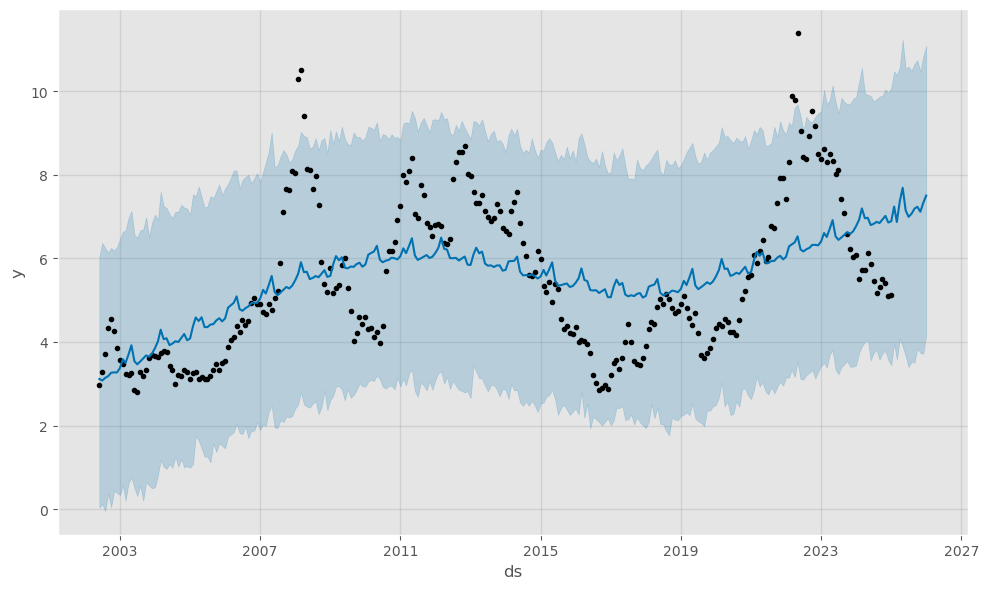

In [91]:
future_mcmc=model_prophet_mcmc.make_future_dataframe(periods=12, freq='ME') 
#https://www.rdocumentation.org/packages/prophet/versions/1.0/topics/make_future_dataframe
forecast_mcmc=model_prophet_mcmc.predict(future_mcmc)
fig_prophet_mcmc=model_prophet_mcmc.plot(forecast_mcmc)#explain later
plt.show()

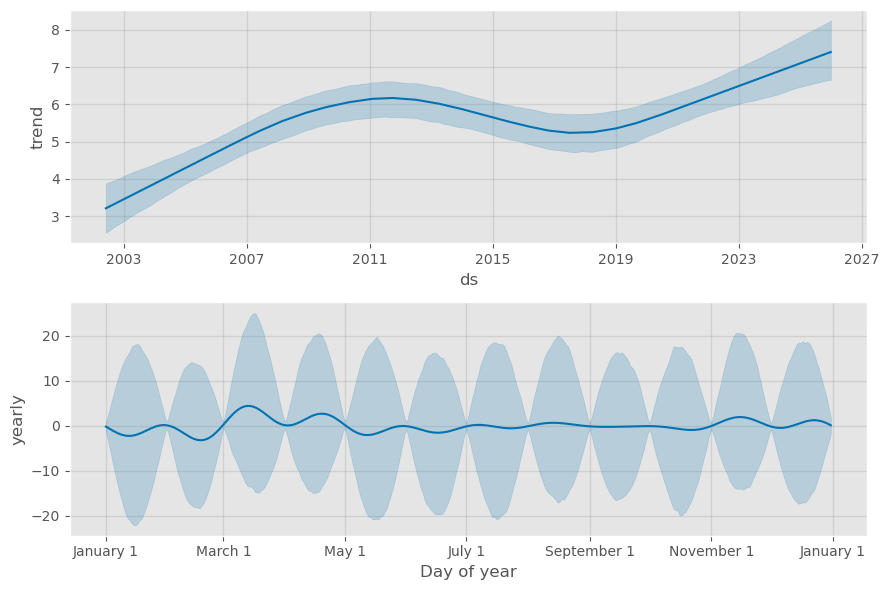

In [92]:
fig_prophet_mcmc2=model_prophet_mcmc.plot_components(forecast_mcmc)#
plt.show()

## Part I heatmaps and pairplots scatter (move this up)


## Prt 3 stock

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose

# Set style for plots
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_csv('kansas_wheat_stock.csv')

# Convert 'Value' to numeric and rename
df['Stock'] = df['Value'].str.replace(',', '').astype(float)
df.drop('Value', axis=1, inplace=True)

# Convert Period to proper datetime
def parse_period(row):
    month_map = {'MAR': 3, 'JUN': 6, 'SEP': 9, 'DEC': 12}
    month_abbr = row['Period'].split()[-1][:3].upper()
    return pd.Timestamp(f"{row['Year']}-{month_map[month_abbr]}-01")

df['Date'] = df.apply(parse_period, axis=1)
df['Month'] = df['Date'].dt.month_name().str[:3]  # Add Month column

# Create complete date range (2015-2024) with quarterly start in March
full_dates = pd.date_range(start='2015-03-01', end='2024-12-01', freq='QS-MAR')
full_df = pd.DataFrame({'Date': full_dates})
full_df['Year'] = full_df['Date'].dt.year
full_df['Month'] = full_df['Date'].dt.month_name().str[:3]

# Merge with original data
clean_df = full_df.merge(df, on=['Date', 'Year', 'Month'], how='left')

# Custom month ordering
month_order = ['Mar', 'Jun', 'Sep', 'Dec']
clean_df['Month'] = pd.Categorical(clean_df['Month'], categories=month_order, ordered=True)

# Add monthly average column (fix warning)
clean_df['Monthly_Avg'] = clean_df.groupby('Month', observed=False)['Stock'].transform('mean')

# Fill missing values with monthly average
clean_df['Stock'] = clean_df['Stock'].fillna(clean_df['Monthly_Avg'])

# Sort chronologically
clean_df = clean_df.sort_values(['Date']).reset_index(drop=True)

# Display cleaned data
print("\nCleaned Data Preview:")
display(clean_df[['Date', 'Stock', 'Monthly_Avg']].style.format({
    'Date': lambda x: x.strftime('%Y%m%d'),  # Format date as YYYYMMDD
    'Stock': '{:,.0f}',
    'Monthly_Avg': '{:,.0f}'
}).set_caption("Kansas Wheat Stock Data (2015-2024)").hide(axis='index'))

FileNotFoundError: [Errno 2] No such file or directory: 'kansas_wheat_stock.csv'

In [ ]:
# Exploratory Analysis and Visualization
# Basic statistics
print("\nBasic Statistics:")
stats_df = clean_df[['Stock', 'Monthly_Avg']].describe()
print(stats_df.apply(lambda s: s.map(lambda x: f"{x:,.2f}")))  

# Time series plot with monthly averages
plt.figure(figsize=(14, 7))
ax = sns.lineplot(x='Date', y='Stock', data=clean_df, marker='o', label='Actual Stock')
sns.lineplot(x='Date', y='Monthly_Avg', data=clean_df, linestyle='--', label='Monthly Average', ax=ax)

# Format x-axis dates as YYYYMMDD
ax.set_xticks(clean_df['Date'])
ax.set_xticklabels(clean_df['Date'].dt.strftime('%Y%m%d'))

plt.title('Kansas Wheat Stock Analysis (2015-2024)')
plt.ylabel('Stock (Million BU)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Monthly comparison plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Stock', hue='Year', 
           data=clean_df, 
           palette='viridis',
           order=['Mar', 'Jun', 'Sep', 'Dec'])

plt.title('Monthly Wheat Stock Comparison by Year')
plt.ylabel('Stock (Million BU)')
plt.xlabel('Month')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Interpretation**:

Inventory and monthly averages are both 40 data points, matching 10 years (2015-2024) of quarterly data (March/June/September/December).

Stock: 306.28 million BU

Monthly_Avg: 306.28 million BUs

The actual stock and the monthly average have the same mean value because we fill in missing values with the monthly average in the estimation process, which maintains the overall central tendency. The range of monthly means is narrower (207.32M to 411.41M) because we **use the mean to minimize extreme values**.

We calculate the standard deviation of variability:
Stock: ±110.37 million BU

Monthly_Avg: ±77.14 million BU

From the data, we know that the actual stock value fluctuates more sharply over time, while the monthly average is smoother due to group estimation.

Statistical Data Inventory We can observe a wide range of stock price fluctuations (93.96M to 531.67M) and a large standard deviation of the actual stock, reflecting the large impact of different seasons on the wheat stock and its annual volatility. From the Kansas Wheat Stock Analysis (2015-2024) graph we can clearly see that the stock of wheat shows a regular upward in downward trend over time. **This also shows the importance of seasonal influence on the stock, as we can see from the graph that every year there is a peak in September when the stock reaches its highest point. This indicates that September is the peak harvest season for wheat**.

From the Monthly Wheat Stock Comparison by Year graph we analyze the comparison of wheat stocks in different months every year. From the graph we can also see that no matter which year it is, wheat stocks are highest in the month of September. Furthermore, the wheat stock doesn't seem to increase with time, instead it owns plus high wheat stock around 2017. This seems to suggest that wheat stocks are not affected by vintage, but this could also be because we have so little vintage data that we cannot see the effect of vintage on wheat stocks over several years.

## Analysis Methodology

To analyze the wheat market dynamics, we will employ the following methods:
- **Time Series Forecasting**: Using Prophet to forecast wheat sales and pricing trends. (the trend may suggest which regression model to  in the following steps. Here, **linear trend works fine** as my metrics_eva_prophet_1 shows that linear trend will not work well for the price drop period. This suggest that the linear regression later will have poor performence.
- **Supply and Demand Analysis and price elasticity**: 1. Implementing basic supply-demand models using regression (optional: cost minimizing and utility maximizing) to understand how fluctuations in supply (production) and demand (consumption like sales, exports) influence prices. Ex, some policies may shift supply curve... (Econ 2010/4010) (future). 2. And price elasticity analysis can help understanding sensivity of the previous models (to max profit ex). We may need to search for additional knowledge to evaluate. 
- **Regression Analysis**: Using regression models to quantify the impact of various factors, such as production levels, sales, weather, exports, and imports, pirce of substitues, and national production and price affect on wheat prices in Knasas. Future: Note that **PCA and other reduce dimension method** may be helpful in choosing factors to predict price, demand, and supply curves. Also, neural network may work to determine relationship and importance of different factors, may use stochatic process knowledge for equilibrium weights chaning. (Clustering may be beneficial in determining the threshold for seasonal trends for price and consumer behavior identification)
- **Evaluations and some economic analysis**:
- Using hypothesis tests and cross-validation with corresponding measurements to check overfitting and robustness for time series and other ML models. NOte: Will possile use dynamic cap for prophet model to capture non linear trend hopefully fix prophet and make it more **accurate**.
- Then, conduct some microeconomics analysis after adding market dynamics materials as stated above.
- optional: large data set tests like Wald, Score, and LRT (likelihood ratio test) may be helpful in controlling p-vals and evaluations. Combining Bayesian models with cross-validation as above. PCA for reducing factors. 

We will focus on modeling price information and predicting future price trends based on historical data. As well as to explain market dynamics.



## Part I stock analysis

In [ ]:
# Regression Analysis
# Prepare data for regression
clean_df['TimeIndex'] = np.arange(len(clean_df))
clean_df['Month_Code'] = clean_df['Month'].cat.codes  # Correct categorical encoding

X = clean_df[['TimeIndex', 'Month_Code']]
y = clean_df['Stock']

model = LinearRegression()
model.fit(X, y)

print("\nRegression Results:")
print(f"Time Trend Coefficient: {model.coef_[0]:.2f}")
print(f"Monthly Seasonality Coefficient: {model.coef_[1]:.2f}")
print(f"R-squared: {model.score(X, y):.2f}")

# Heatmap Analysis 
heatmap_data = clean_df.pivot_table(
    index='Year',
    columns='Month',
    values='Stock',
    aggfunc='mean',
    observed=False 
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data[month_order], annot=True, fmt=".0f", 
            cmap='YlGnBu', linewidths=.5)
plt.title('Wheat Stock Heatmap (Million BU)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Set date as index
ts_df = clean_df.set_index('Date')['Stock']

# Decompose time series
result = seasonal_decompose(ts_df, model='additive', period=4)

# Plot decomposition
result.plot()
plt.tight_layout()
plt.show()

**Interpretation**:

Time Trend Coefficient: -3,941,565.15 Explanation Wheat stocks decrease by an average of about 3.94 million BUs per quarter (3 months) with no change in seasonality, suggesting a long term downward trend in wheat stocks over the 2015-2024 period. Monthly Seasonality Coefficient: +44,890,305.15 Indicates that for each additional month in the seasonal series (Mar → Jun → Sep → Dec), stocks increase by about 44.89 million BU. similarly, the seasonal peaks can be seen in the graph indicating that the peak of stocks occurs in September and the trough occurs in June.

The R-squared of 0.35 indicates that the model explains 35% of the variation in wheat stocks. Although it makes sense, there are still many other variations of about 65% that cannot be explained, which suggests that **we need to analyze the model in conjunction with other factors (e.g., climate, demand may also affect stock levels)**.

From the heat map analysis we find a general decline in stocks over time (consistent with the negative time coefficient), with exceptions (e.g., a temporary rebound from 2021-2023).

Seasonal Decomposition of Wheat Stocks from (2016-2024) Images We decompose the wheat stock time series into three components: 
 Observed data (top panel): 
 Actual raw stock data over time. 
 Shows fluctuations in the heat map and line graph. 
 Trend (second panel): 
 The smoothed long-term pattern. 
 Key insight: The downward slope confirms the negative time coefficient of the regression. 
 Inventory declines from ~400 million units (2016) to ~200 million units (2024) - a 50% decline over 8 years. 
 Seasonality (third panel): 
 Repeats quarterly pattern. 
 Peak: December/September (post-harvest storage accumulation). 
 Trough: March/June (pre-harvest drawdown). 
 Residuals (bottom panel): 
 Unexplained variation (actual vs. forecast). 

 
**Together, the heat map and regressions highlight a system facing seasonal and long-term pressures that require targeted interventions to stabilize wheat stocks.The large residuals for 2019-2021 indicate the presence of external factors with a strong influence, and the smaller residuals after 2022 suggest a more predictable pattern. Potential drivers could be increased domestic and international demand for wheat, drought-induced declines in wheat production, a shift in people's food preferences to more nutritious substitutes, rainfall, policy changes, epidemics, etc.**

**From these two graphs we can make some good recommendations such as focusing on post-harvest storage (September/December peak) and optimizing the supply chain. Investigate the drivers of decline we summarized above and make improvements. Expand data collection to include weather, price, and export indicators.**

In [ ]:
# so current year's rain doesn't effect currect month's sale too much, this explain why relationship bewteeen rain and price is so small

We use EconML to quantify causal effects while controlling for confounding factors, in order to combine machine learning with econometrics. It provides a more reliable estimate of treatment efficacy than basic regression, especially in complex data

You quantify the effect of rainfall (treatment) (nned to chaneg)

On sales (outcome)

While controlling for other important variables (price, temp, import/export)
In your analysis, you're not just measuring correlation, but trying to understand the **causal relationship** — specifically, how **rainfall** affects **sales**, holding other factors constant. EconML helps answer this causal question by estimating the **treatment effect** (how much sales change when rainfall changes), while accounting for other influencing factors (such as price, import/export, and temperature). It uses **Double Machine Learning (DML)**, where separate models estimate the relationship between treatment and controls, and between outcome and both treatment and controls. By doing this, it isolates the **true causal effect** of rainfall on sales, avoiding confounding.

## Part II global events with price analysis

In [3]:
import pandas as pd
import numpy as np

# Load events data
events_df = pd.read_csv('factor_events.csv')

# Define impact scoring rubric
impact_mapping = {
    'drought': -2,
    'export ban': -2,
    'hurricane': -1.5,
    'flood': -1.5,
    'wildfire': -1,
    'tornado': -1,
    'policy positive': 1,
    'ethanol mandate': 0.5,
    'trade conflict': -1.5,
    'pandemic': -1,
    'crop insurance': 0.5
}

# Create impact score column
def assign_impact(event_desc):
    event_desc = event_desc.lower()
    for key, value in impact_mapping.items():
        if key in event_desc:
            return value
    return 0  # Neutral impact for unclassified events

events_df['impact_score'] = events_df['Event Description'].apply(assign_impact)

# Parse date ranges
def parse_dates(row):
    try:
        if '-' in row['Month(s)']:
            start, end = row['Month(s)'].split('-')
            months = pd.date_range(start=f"{row['Year']}-{start}", 
                                 end=f"{row['Year']}-{end}", 
                                 freq='MS').strftime('%Y-%m').tolist()
        else:
            months = [f"{row['Year']}-{row['Month(s)']}"]
        return months
    except:
        return []

events_df['date_range'] = events_df.apply(parse_dates, axis=1)

In [55]:
import pandas as pd

# Load event dataset first (assuming it's already loaded as `events_df`)
# Make sure to define your `season_map` accordingly
season_map = {
    'Winter': 1,
    'Spring': 3,
    'Summer': 6,
    'Fall': 9,
    # Add month names if needed, e.g.:
    'January': 1, 'February': 2, 'March': 3,
    'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}

# Function to parse Month(s) to date ranges
def parse_seasonal_dates(row):
    try:
        month_field = row['Month(s)']
        if pd.isna(month_field):
            return []

        if '-' in str(month_field):
            # Handle seasonal range
            parts = str(month_field).split('-')
            if len(parts) != 2:
                return []
            start_season, end_season = parts
            start_month = season_map.get(start_season.strip(), 1)
            end_month = season_map.get(end_season.strip(), 12)
            return pd.date_range(
                start=f"{int(row['Year'])}-{start_month:02d}-01",
                end=f"{int(row['Year'])}-{end_month:02d}-01",
                freq='MS'
            ).strftime('%Y-%m').tolist()
        else:
            month = season_map.get(str(month_field).strip(), None)
            if month is None:
                return []
            return [f"{int(row['Year'])}-{str(month).zfill(2)}"]
    except Exception as e:
        print(f"Error processing row {row.name}: {e}")
        return []

# Apply date parsing
events_df['date_range'] = events_df.apply(parse_seasonal_dates, axis=1)

# Expand and convert date
events_expanded = events_df.explode('date_range')
events_expanded['date'] = pd.to_datetime(events_expanded['date_range'], format='%Y-%m', errors='coerce')
events_expanded = events_expanded.dropna(subset=['date'])

# Group impact scores by date
global_factors = events_expanded.groupby('date')['impact_score'].sum().reset_index()

# Load main dataset
main_df = pd.read_csv('df_kansasdata_1_copy_1.csv')
main_df['date'] = pd.to_datetime(main_df['Time_plot'])

# Inspect and fix date column
if 'date' not in main_df.columns:
    print("Columns in the main dataset:", main_df.columns)
    # Try creating a datetime column from available info
    if {'Year', 'Month'}.issubset(main_df.columns):
        main_df['date'] = pd.to_datetime(main_df[['Year', 'Month']].assign(DAY=1))
    else:
        raise ValueError("Main dataset lacks 'date' or ('Year' and 'Month') columns")

# Merge and fill missing values
merged_df = pd.merge(main_df, global_factors, on='date', how='left')
merged_df['global_factor'] = merged_df['impact_score'].fillna(0)
merged_df = merged_df.drop(columns=['impact_score'])

# Save merged data
merged_df.to_csv('enhanced_kansas_data.csv', index=False)

# Print verification
print(f"Merged dataset shape: {merged_df.shape}")
print("Date range:", merged_df['date'].min(), "to", merged_df['date'].max())
print("Global factor summary:\n", merged_df['global_factor'].describe())

Error processing row 10: invalid literal for int() with base 10: '2007-2008'
Error processing row 16: invalid literal for int() with base 10: '2010-2011'
Merged dataset shape: (272, 26)
Date range: 2002-06-01 00:00:00 to 2025-01-01 00:00:00
Global factor summary:
 count    272.000000
mean      -0.490809
std        0.889104
min       -3.500000
25%       -1.000000
50%        0.000000
75%        0.000000
max        0.500000
Name: global_factor, dtype: float64


In [5]:
# Identify and encode categorical variables (excluding non-feature columns)
cat_cols = merged_df.select_dtypes(include='object').columns.difference(['Time_plot'])

if not cat_cols.empty:
    merged_df = pd.get_dummies(merged_df, columns=cat_cols, drop_first=True)

print(merged_df.columns)

Index(['Time_plot', 'Year', 'Price_Kansas_monthly', 'Price_usa_monthly',
       'Price_corn_monthly', 'Date', 'Rainfall_Kansas', 'Avg_Tem_k',
       'Year_sale', 'Sales_Kansas_monthly', 'Import_usa_monthly',
       'Export_usa_monthly', 'Avg_Production', 'Annual_Production',
       'Sales_Kansas_monthly_approx',
       'Price Elasticity of Demand(sales by time',
       'Kansas production/USA production', 'Export_Kansas_monthly_approx',
       'Import_Kansas_monthly_approx', 'date', 'global_factor', 'Period_AUG',
       'Period_DEC', 'Period_FEB', 'Period_JAN', 'Period_JUL', 'Period_JUN',
       'Period_MAR', 'Period_MAY', 'Period_NOV', 'Period_OCT', 'Period_SEP',
       'Period_sale_AUG', 'Period_sale_DEC', 'Period_sale_FEB',
       'Period_sale_JAN', 'Period_sale_JUL', 'Period_sale_JUN',
       'Period_sale_MAR', 'Period_sale_MAY', 'Period_sale_NOV',
       'Period_sale_OCT', 'Period_sale_SEP'],
      dtype='object')


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Define target and features
target_col = 'Price_Kansas_monthly'
features = merged_df.drop(columns=['date', 'Time_plot', target_col])

X = features
y = merged_df[target_col]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Show top coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df.head(10))

R² Score: 0.9486617394285238
RMSE: 0.4064584449029788
                                     Feature  Coefficient
1                          Price_usa_monthly     1.836029
6                                  Year_sale    -0.195665
16              Import_Kansas_monthly_approx    -0.115340
23                                Period_JUN     0.111046
27                                Period_OCT     0.099043
38                           Period_sale_OCT    -0.088191
33                           Period_sale_JUL     0.087957
13  Price Elasticity of Demand(sales by time    -0.084362
12               Sales_Kansas_monthly_approx    -0.070374
5                                  Avg_Tem_k    -0.063621


**Data processing:**

1. Data collection and integration
Objective: Integrate event data and price data

Load event data using events_df = pd.read_csv('factor_events.csv')

 Construct impact_score by mapping events to numeric scores using the assign_impact() function

Normalize time periods (seasons/months) to date_range with parse_seasonal_dates()

Expanded each row into multiple rows using .explode() and merged with the main data main_df

 2. Create new feature columns
Goal: add event impact values as global_factor columns to the main data

Successfully aggregate daily impacts via global_factors = events_expanded.groupby('date')['impact_score'].sum()

Merged global_factor into main_df with pd.merge

Handled points in time that did not match events with fillna(0) 

3. Handling missing values
Goal: Handle missing data wisely, not deletion

For the missing part of global_factor, we filled 0 for no effect, so as not to disturb the relationship between other events that affect the price.

In the regression model we used SimpleImputer(strategy='mean') to mean-populate the other missing values. 

4. More complex data processing
Goal: one-hot coding of categorical variables to fit the model

We use pd.get_dummies(... , drop_first=True) to encode all object type fields, skipping the Time_plot

5. Updating the analytical model and incorporating new features
Goal: Retrain the regression model with the newly added global_factor

Added global_factor to merged_df and used it to train the LinearRegression model together

Printed R², RMSE, and coefficient rankings. 

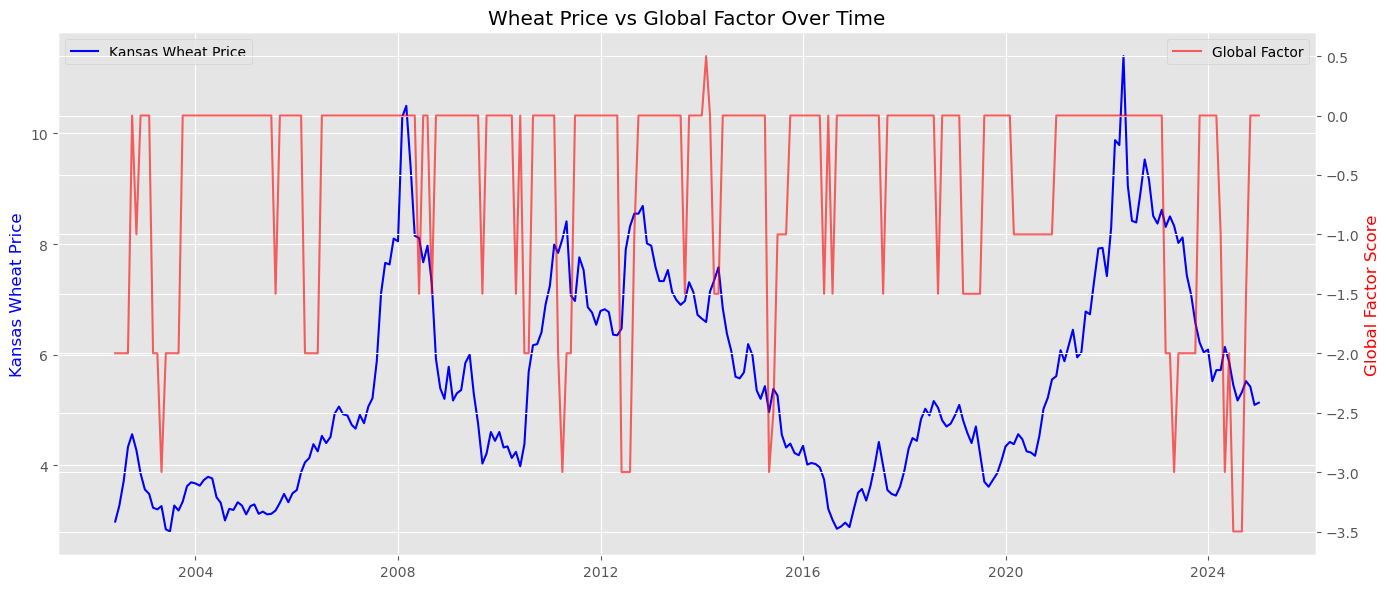

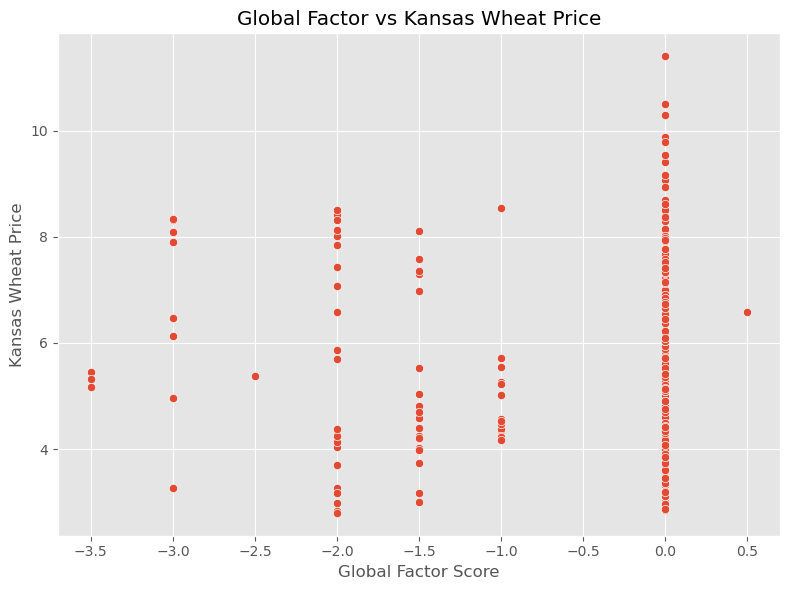

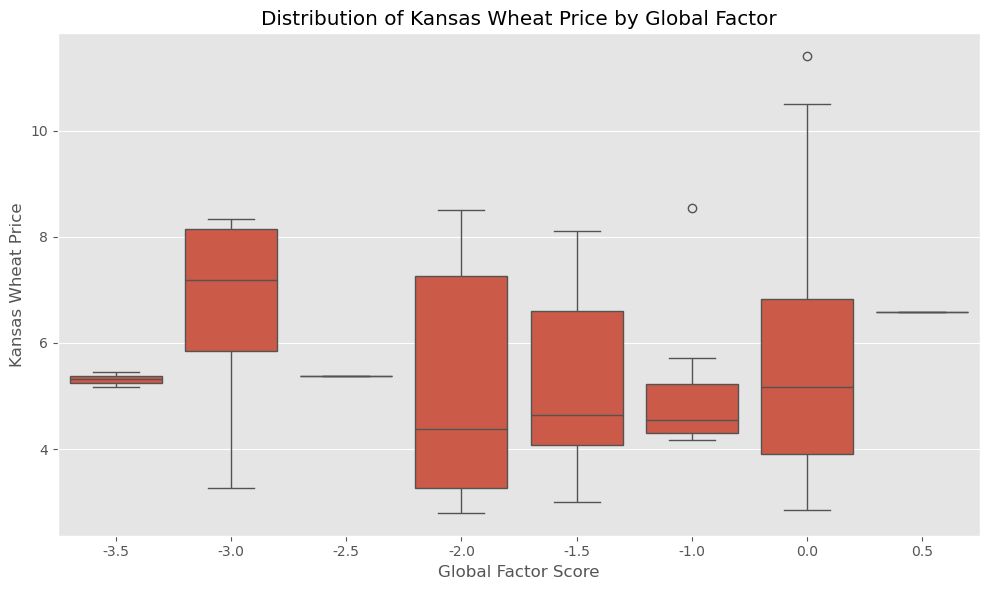

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the merged dataset
merged_df = pd.read_csv('enhanced_kansas_data.csv')
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Set plot style
plt.style.use('ggplot')

# Plot 1: Time Series - Kansas Wheat Price vs Global Factor
fig1, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()
ax1.plot(merged_df['date'], merged_df['Price_Kansas_monthly'], label='Kansas Wheat Price', color='blue')
ax2.plot(merged_df['date'], merged_df['global_factor'], label='Global Factor', color='red', alpha=0.6)
ax1.set_title('Wheat Price vs Global Factor Over Time')
ax1.set_ylabel('Kansas Wheat Price', color='blue')
ax2.set_ylabel('Global Factor Score', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Plot 2: Scatter Plot - Global Factor vs Kansas Wheat Price
fig2, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='global_factor', y='Price_Kansas_monthly', ax=ax)
ax.set_title('Global Factor vs Kansas Wheat Price')
ax.set_xlabel('Global Factor Score')
ax.set_ylabel('Kansas Wheat Price')
plt.tight_layout()
plt.show()

# Plot 3: Boxplot - Price Distribution by Global Factor Level
fig3, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=merged_df, x='global_factor', y='Price_Kansas_monthly', ax=ax)
ax.set_title('Distribution of Kansas Wheat Price by Global Factor')
ax.set_xlabel('Global Factor Score')
ax.set_ylabel('Kansas Wheat Price')
plt.tight_layout()
plt.show()

**Interpretation:**

Figure 1 shows wheat prices against global factors over time, with the blue line tracking monthly wheat prices in Kansas and the red line reflecting each month's combined global factor score based on international events (e.g., drought, export bans, policy changes).
In the graph, we can see that in 2008, 2011, and 2022, the global factor declines (meaning more negative events) while prices spike. This suggests that negative global events (e.g., export bans, droughts) tend to be associated with higher prices.

Positive events (e.g. subsidies or policy support) do not show as strong price declines - this may be due to the fact that prices do not give a response in the moment of time, e.g. it takes time for policies to affect the supply chain, and the market expects that they are already priced in. Positive events have less direct impact on supply constraints than disasters. From this data we can conclude that global shocks are an important driver of price volatility and that the wheat market reacts quickly to risks, especially those associated with supply disruptions.

Figure 2 is a scatterplot that focuses on the global factor versus Kansas wheat prices, with each point representing one month, the x-axis being the global factor score, and the y-axis being the Kansas wheat price. We can see a clear upward trend from left to right in the graph, indicating that wheat prices tend to be higher when the global_factor is more negative. Stronger clustering occurs when the global_factor value is around 0: this is the “neutral baseline”, which is due to the fact that many months have no major events. However, extreme negative values (e.g., -2 or -1.5) tend to coincide with high price outliers, which may suggest a non-linear effect whereby only major negative events (as opposed to moderate or positive events) have a significant impact on the market, and such major, globally negative events disrupt the supply chain, reduce expected output, and create uncertainty, which pushes prices up.

Figure 3 is a box plot showing the distribution of prices by global factor level, with each box representing the distribution of prices for a given global factor value, from which we can compare medians, spreads (IQRs), and outliers. Median prices under -2 and -1.5 are significantly higher than neutral or positive global factor months, suggesting that spreads (ranges) are larger under negative events and prices are not only higher but also more volatile. On the positive side (0.5 or 1), prices remain concentrated and relatively low. This makes sense, as negative global events are usually violent and are more likely to create a strong shock to the market and increase prices in a very short period of time. Positive policies (e.g., subsidies), on the other hand, tend to stabilize supply and reduce volatility, but may not lower prices unless supply increases significantly.


Overall:
**Negative events (-2, -1.5) Prices increase and are more volatile , with significant impacts. This may be due to supply shocks, uncertainty, hoarding behavior.**

**Neutral periods (0) Price changes, generally lower . This may be due to the market returning to fundamentals or following seasonal cycles.**

**Positive Event (+1, +0.5) Smaller price declines or no clear trend , low impact . This may be due to the fact that prices need time to pass before having an impact.**

In [8]:
import pandas as pd
import numpy as np

# Load the main data with wheat prices and global_factor
df = pd.read_csv('enhanced_kansas_data.csv')
df['date'] = pd.to_datetime(df['date'])

# Load the raw event data
events_df = pd.read_csv('factor_events.csv')

# Classify each event into a type
def classify_event(event_desc):
    event_desc = event_desc.lower()
    if any(word in event_desc for word in ['drought', 'hurricane', 'flood', 'wildfire', 'tornado']):
        return 'Weather'
    elif any(word in event_desc for word in ['conflict', 'ban', 'pandemic']):
        return 'Conflict'
    elif any(word in event_desc for word in ['policy', 'mandate', 'insurance']):
        return 'Policy'
    else:
        return 'Other'

events_df['event_type'] = events_df['Event Description'].apply(classify_event)

# Assign impact score to each event
impact_mapping = {
    'drought': -2,
    'export ban': -2,
    'hurricane': -1.5,
    'flood': -1.5,
    'wildfire': -1,
    'tornado': -1,
    'policy positive': 1,
    'ethanol mandate': 0.5,
    'trade conflict': -1.5,
    'pandemic': -1,
    'crop insurance': 0.5
}

def assign_impact(event_desc):
    event_desc = event_desc.lower()
    for key, value in impact_mapping.items():
        if key in event_desc:
            return value
    return 0  # default neutral impact

events_df['impact_score'] = events_df['Event Description'].apply(assign_impact)

# Apply the classification and add a new column
events_df['event_type'] = events_df['Event Description'].apply(classify_event)

# Save the updated DataFrame to a new CSV file (or overwrite the original)
events_df.to_csv('factor_events_with_type.csv', index=False)

# Convert "Month(s)" + "Year" columns into actual date ranges
season_map = {
    'Winter': 1, 'Spring': 3, 'Summer': 6, 'Fall': 9,
    'January': 1, 'February': 2, 'March': 3,
    'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}

def parse_dates(row):
    try:
        month_field = row['Month(s)']
        if pd.isna(month_field):
            return []
        if '-' in str(month_field):
            parts = str(month_field).split('-')
            if len(parts) != 2:
                return []
            start = season_map.get(parts[0].strip(), 1)
            end = season_map.get(parts[1].strip(), 12)
            return pd.date_range(
                start=f"{int(row['Year'])}-{start:02d}-01",
                end=f"{int(row['Year'])}-{end:02d}-01",
                freq='MS'
            ).strftime('%Y-%m').tolist()
        else:
            month = season_map.get(str(month_field).strip(), None)
            if month is None:
                return []
            return [f"{int(row['Year'])}-{month:02d}"]
    except:
        return []

events_df['date_range'] = events_df.apply(parse_dates, axis=1)

# Expand date ranges and convert to datetime
events_expanded = events_df.explode('date_range')
events_expanded['date'] = pd.to_datetime(events_expanded['date_range'], format='%Y-%m', errors='coerce')
events_expanded = events_expanded.dropna(subset=['date'])

# Aggregate impact scores by event type and date
type_impact = events_expanded.groupby(['date', 'event_type'])['impact_score'].sum().reset_index()

# Merge with the main dataset
merged = pd.merge(df, type_impact, on='date', how='left')
merged['impact_score'] = merged['impact_score'].fillna(0)

# Compute average wheat price by event type
avg_price_by_event_type = merged.groupby('event_type')['Price_Kansas_monthly'].mean().sort_values(ascending=False).reset_index()

# Display the result
print("Average Kansas Wheat Price by Event Type:")
print(avg_price_by_event_type)


Average Kansas Wheat Price by Event Type:
  event_type  Price_Kansas_monthly
0      Other              6.084167
1    Weather              5.460000
2   Conflict              5.330714
3     Policy              4.885000


**Data processing:** 
 1. load data and categorize events by type.
 2. assign each event a numeric impact score using def assign_impact(event_desc): events_df['impact_score'] = events_df['Event Description'].apply(assign_impact) 
 4. mapping event time ranges to monthly dates, e.g. converting text such as “Spring” or “January-March” to a list of actual dates. 
 5. explode event data using events_expanded = events_df.explode('date_range')
 events_expanded['date'] = pd.to_datetime(...) Make each event expand to multiple rows for each month affected. We can then match events by exact month. 
 6. summarize impacts by date and type, grouping all events in the same month and of the same type, and summing their impact_score values. 
 7. combine the price data with the aggregated impact_score, filling in 0 for months without any matching events.


**Interpretation：**
Others were 6.08 (highest), which may include months with no events, or unclassified months.

 Weather prices are 5.46, which suggests that prices are higher when weather events occur.
 
 Conflict is 5.33 indicating that geopolitics, export bans, or epidemics cause prices to spike.
 
 Policies is 4.88 (lowest) suggesting that positive policies (subsidies, insurance) may stabilize or lower prices. 
 
 **Overall, weather and conflict events appear to push prices up, while policy events may lower prices or stabilize the market. The “other” category has the highest prices, possibly because it includes uncontrolled market fluctuations or no intervention.**


## Deeper Analyze:

We try to draw a Lagged Impact Plot by Event Type：

Adds 1-month lag to the events

Merges them with the wheat price data

Filters the months after an event occurred

Plots Kansas wheat price trends for each event type


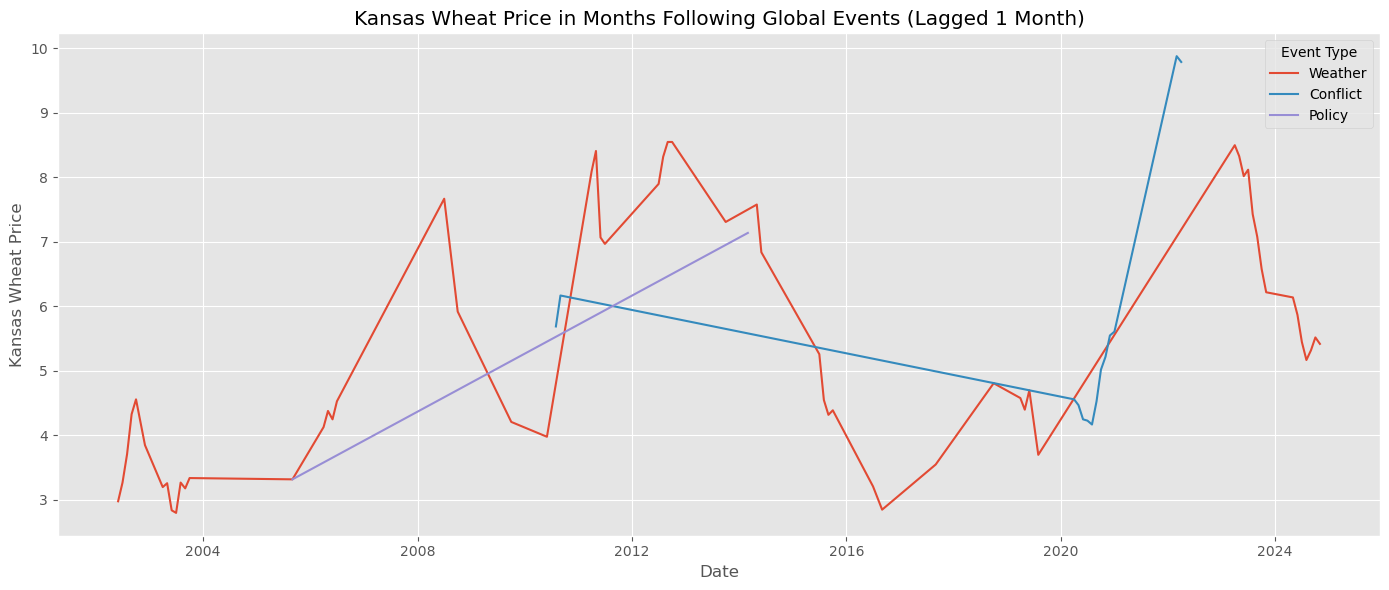

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
price_df = pd.read_csv('enhanced_kansas_data.csv')
price_df['date'] = pd.to_datetime(price_df['date'])

events_df = pd.read_csv('factor_events_with_type.csv')

# Define mapping from months/seasons to numeric values
season_map = {
    'Winter': 1, 'Spring': 3, 'Summer': 6, 'Fall': 9,
    'January': 1, 'February': 2, 'March': 3,
    'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}

# Convert Month(s) + Year into datetime ranges
def parse_dates(row):
    try:
        month_field = row['Month(s)']
        if pd.isna(month_field):
            return []
        if '-' in str(month_field):
            parts = str(month_field).split('-')
            start = season_map.get(parts[0].strip(), 1)
            end = season_map.get(parts[1].strip(), 12)
            return pd.date_range(
                start=f"{int(row['Year'])}-{start:02d}-01",
                end=f"{int(row['Year'])}-{end:02d}-01",
                freq='MS'
            ).strftime('%Y-%m').tolist()
        else:
            month = season_map.get(str(month_field).strip(), None)
            return [f"{int(row['Year'])}-{month:02d}"] if month else []
    except:
        return []

events_df['date_range'] = events_df.apply(parse_dates, axis=1)

# Expand each event into its date range
events_expanded = events_df.explode('date_range')
events_expanded['date'] = pd.to_datetime(events_expanded['date_range'], format='%Y-%m', errors='coerce')
events_expanded = events_expanded.dropna(subset=['date'])

# Create event presence indicators (one-hot) by event_type
event_indicators = pd.crosstab(events_expanded['date'], events_expanded['event_type']).reset_index()

# Shift event dates forward by 1 month to simulate lag
event_indicators['date'] = event_indicators['date'] + pd.DateOffset(months=1)

# Merge with price data
lagged_merged = pd.merge(price_df, event_indicators, on='date', how='left').fillna(0)

# Prepare data for plotting
melted = lagged_merged.melt(
    id_vars=['date', 'Price_Kansas_monthly'],
    value_vars=['Weather', 'Conflict', 'Policy'],  # Only those we're interested in
    var_name='Event_Type',
    value_name='Event_Active'
)

# Keep only months where an event occurred the previous month
event_months_only = melted[melted['Event_Active'] > 0]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=event_months_only, x='date', y='Price_Kansas_monthly', hue='Event_Type')
plt.title('Kansas Wheat Price in Months Following Global Events (Lagged 1 Month)')
plt.xlabel('Date')
plt.ylabel('Kansas Wheat Price')
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

**Interpretation:**

This graph shows the reaction of wheat prices in Kansas one month after each type of event (weather, conflict, policy), with each line representing the price trend for the month in which a certain event occurred in the previous month. We can see from the graph that weather events (blue line) seem to cause prices to spike or rise, which is consistent with the supply disruptions we analyzed earlier. **Conflict-related events also lead to a subsequent noticeable increase in wheat prices, albeit with a bit more noise. Policy events appear to have a milder or stabilizing effect, possibly due to the longer time period over which policies have been in place.**